<a href="https://colab.research.google.com/github/cuhkrsdi/newspaper-analytics/blob/main/Word_Cloud_and_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas
import json

In [ ]:
def js_r(filename: str):
  with open(filename) as f_in:
    return json.load(f_in)

ymd_freq_dict = js_r("/content/drive/MyDrive/Colab Notebooks/Frequency_JSON/ymd_frequency001.json")

In [ ]:
# ymd_freq_dict = {year_month_day:{ner_word:{type0: freq, type1: freq, type2: freq, ...}}}
len(ymd_freq_dict)

3250

###Filters

In [ ]:
PERSON_list = ['毛澤東',
             '尼克遜',
             '陳孝威',
             '赫魯歇夫',
             '林彪',
             '艾森豪',
             '何濟公',
             '史大林',
             '周恩來',
             '邱吉爾',
             '毛泽柬',
             '劉少奇',
             '李承晚',
             '杜爾斯',
             '戴高樂',
             '李世民',
             '杜魯門',
             '狄托',
             '李宗仁',
             '雷根',
             '威孝陳',
             '希特勒',
             '胡志明',
             '中山',
             '尼赫魯',
             '王世昭',
             '吳廷琰',
             '甘迺迪',
             '毛澤柬',
             '孔子',
             '鄧小平',
             '麥帥',
             '上帝',
             '蔣公',
             '麥克阿瑟',
             '蘇加諾',
             '韋千里',
             '袁世凱',
             '艾登',
             '羅邱杜',
             '陳毅',
             '羅斯福',
             '吉田',
             '孝威',
             '孫中山',
             '朴正熙',
             '老赫',
             '朱可夫',
             '馬歇爾',
             '甘地',
             '江青',
             '史太林',
             '張學良',
             '老毛',
             '邱翁',
             '胡適',
             ' 孝陳',
             '曹汝霖',
             '魯斯克',
             '杜月笙',
             '朱德',
             '艾森',
             '卡斯特羅',
             '列寧',
             '古月',
             '佐藤',
             '基辛格',
             '張作霖',
             '毛澤棗',
             '朱子',
             '威爾遜',
             '基督',
             '阿登諾',
             '于右任',
             '曹操',
             '阮文紹',
             '汪精衛',
             '孟子',
             '李光耀',
             '陳誠',
             '袁樹珊',
             '邁一',
             '金日成',
             '李白',
             '李奇威',
             '克拉克',
             '李鴻章',
             '毛泽東',
             '莫洛托夫',
             '史達林',
             '黄旭初',
             '田中',
             '秀蘭',
             '社魯門',
             '拉曼',
             '段宏俊',
             '馮玉祥',
             '甘廼廸',
             '蔣介石',
             '左舜生',
             '裴航',
             '岳飛',
             '魯迅',
             '黎元洪',
             '吉田茂',
             '張世明',
             '耶穌',
             '納薩',
             '劉邦',
             '陳立夫',
             '郭沫若',
             '蔣經國',
             '臧勺波',
             '艾森豪威爾',
             '余叔岩',
             '馬可斯',
             '毛邦初',
             '胡宗南',
             '周佛海',
             '鳩山',
             '毛主席',
             '林黛',
             '李彌',
             '金典戎',
             '魯門',
             '毛澤',
             '胥端甫',
             '段祺瑞',
             '李宗黄',
             '尹望卿',
             '葉公超',
             '葛羅米柯',
             '陶百川',
             '高玉樹',
             '隙孝威',
             '王世杰',
             '胡漢民',
             '宋子文',
             '艾契遜',
             '孫科',
             '秦檜',
             '張宗昌',
             '胡秋原',
             '赫爾利',
             '馬思聰',
             '章太炎',
             '袁世凯',
             '李宗黃',
             '陳孝',
             '希特拉',
             '尹仲容',
             '潘佩珠',
             '李淵',
             ' 作藩',
             '元陽',
             '馬克斯',
             '詹淼',
             '哈里曼',
             '何應欽',
             '沈昌煥',
             '唐太宗',
             '龔德柏',
             '于斌',
             '杜甫',
             '羅拔',
             '梅蘭芳',
             '赫鲁歇夫',
             '康生',
             '赫魯曉夫',
             '孫立人',
             '周至柔',
             '艾德禮',
             '汪希文',
             '黃旭初',
             '秦始皇',
             '韓福瑞',
             '李璜',
             '唐生智',
             '蒋公',
             '張治中',
             '徐樹錚',
             '蔡元培',
             '姜味',
             '史汀生',
             '李先念',
             '拿破崙',
             '森豪',
             '陳孝咸',
             '周恩',
             '沙皇',
             '戴高檠',
             '赫魯歇',
             '吳稚暉',
             '孟昶',
             '世凱',
             '廖承志',
             '易君左',
             '徐世昌',
             '作霖',
             '柯西金',
             '陳平',
             '張羣',
             '大林',
             '馬克思',
             '林肯',
             '湘雲',
             '柯錫金',
             '阮高祺',
             '張大干',
             '王克敏',
             '左宗棠',
             '羅瑞卿',
             '莫浴托夫',
             '馬可仕',
             '安德洛波夫',
             '少奇',
             '陳孝戚',
             '毛浑柬',
             '日皇',
             '胡佛',
             '沙立',
             '黄帝',
             '李立三',
             ' 孝威',
             '彭德懷',
             '張其昀',
             '何鳳仙',
             '尼溫',
             '雲英',
             '劉湘',
             '甘迺廸',
             '徐悲鴻',
             '杜娟',
             '楊志雲',
             '裕仁',
             '谷正綱',
             '胡耀邦',
             '賀龍',
             ' 文英',
             '溥儀',
             '蔡松坡',
             '吳子深',
             '郭松齡',
             '趙匡胤',
             '麥美倫',
             '尼赫',
             '白崇禧',
             '汪政府',
             '邵力子',
             '局恩來',
             '張發奎',
             '達賴',
             '徐向前',
             '胡適之',
             '吳鐵城',
             '張大千',
             '屈原',
             '宋哲元',
             '吴廷琰',
             '湯恩伯',
             '曹雪芹',
             '楊宇霆',
             '楊文明',
             '蔣忠',
             '徐立德',
             '薛岳',
             '周恩柬',
             '黃杰',
             '蘇卡諾',
             '崔德新',
             '毛泽',
             '羅素',
             '甘廼迪',
             '韓信',
             '李梅',
             '林語堂',
             '劉伯承',
             '卞玉京',
             '卡斯特',
             '莫德惠',
             '陳公博',
             '鄭成功',
             '可夫',

             '陶鑄',
             '陳辭修',
             '陳獨秀',
             '麥納瑪拉',
             '孫運璿',
             '孔明',
             '魏德邁',
             '王雲五',
             '項羽',
             '尤敏',
             '沙達',
             '傅作義',
             '赫魯',
			 
			 
			 
			 
			 
			 
			 
             '魏道明',
             '池田',
             '尼赫鲁',
             '丁皓',
             '毛松年',
             '孔祥熙',
             '阮高奇',
             '毛森',
             '吳佩爭',
             '陳孝成',
             '羅拔甘迺迪',
             '王正廷',
             '張岳軍',
             '周揚',
             '高華德', 
             '張君',
             '黄杰',
             '王明',
             '黃少谷',
             '符雙君',
             '蘇哈托',
             '蒋介石',
             '吳國楨',
             '康南海',
             '梁任公',
             '武元甲',
             '于右老',
             '沈劍虹',
             '劉峙', 
             '粱任公',
             '强作霖',
             '費正清',
             '太炎',
             '郁達夫',
             '陳納德',
             '邵氏',
             '曹錕',
             '胡展堂',
             '陈孝威',
             '維辛斯基',
             '杭立武',
             '陶希聖',
             '史迪威',
             '康有為',
             '貝隆',
             '陳濟棠',
             '黄少谷',
             '朱元璋',
             '溫莎',
             '張維翰',
             '樂蒂',
             '田中角榮',
             '斯大林',
             '李孝式',
             '俞大維',
             '俞鴻鈞',
             '元洪',
             '傅奇',
             '范文同',
             '周恩聚',
             '閻錫山',
             '戴季陶',
             '余家菊',
             '秋瑾',
             '葛量洪',
             '陳伯達',
             '布萊德雷',
             '黄克强',
             '張之洞',
             '華萊士',
             '邵逸夫',
             '周書楷',
             '李富春',
             '赫替歇夫',
             '乾隆',
             '周思來',
             '許世英',
             '胡蝶',
             '經國',
             '宋江',
             '王寵惠',
             '黄旭韧',
             '黄炎培',
             '張知本',
             '克遜',
             '黎晉偉',
             '周恩来',
             '蔣經圃',
             '沈昌焕',
             '艾其遜',
             '王安石',
             '葉劍英',
             '李陵',
             '李靖',
             '劉喜奎',
             '越匡胤',
             '月笙',
             '何宜武',
             '孟代爾',
             '布特勒',
             '胡慶育',
             '兀朮',
             '李凰',
             '金日戍',
             '傅斯年',
             '小平',
             '李敖',
             '林挺生',
             '段麒瑞',
             '劉備',
             '黎玉',
             '李湄',
             '汪精衙',
             '余兆麒',
             '里千韋',
             '葛蘭',
             '李井泉',
             '丁玲',
             '孫哲生',
             '陳啟天',
             '阮玲玉',
             '宗昌',
             '韓瑪紹',
             '施漢諾',
             '阿拉法特',
             '阿格紐',
             '李登輝',
             '吳光新',
             '彭德',
             '王揖唐',
             '彭昭賢',
             '林翠',
             '康熙',
             '許崇智',
             '袁項城',
             '毛浮柬',
             '李德全',
             '楊雲史',
             '鳩山一郎',
             '蕭何',
             '尼宽遜',
             '杜邱羅',
             '李烈鈞',

             '灶神',

             '何志浩',
             '布雷',
             '李斯',
             '李品仙',
             '陶峙岳',
             '蔣百里',
             '鬼谷子',
             '吳大猷',
             '王叔銘',
             '耶稣',
             '杜威',
             '李秀成',
             '倪文亞',
             '麥卡錫',
             '郭雨新',
             '王光美',
             '沈君山',
             '羅隆基',
             '程潛',
             '吳三桂',
             '張伯倫',
             '梁啟超',
             '法朗士',
             '卡特',
             '王誠',
             '陳香梅',
             '毛瀑東',
             '陳紹禹',
             '粱啟超',
             '顧維鈞',
             '池田勇人',
             '張之江',
             '潘金蓮',
             '彭孟緝',
             '董力行',
             '董浩雲',
             '阮正詩',
             '徐季良',
             '楊貴妃',
             '司徒雷登',
             '邱清泉',
             '宋教仁',
             '汪精衞',
             '潘公展',
             '凌波',
             '簡又文',
             '佐藤榮作',
             '張任民',
             '蔣彥士',
             '蔣廷黻',
             '陳果夫',
             '洪秀全',
             '庚子',
             '汪精',
             '廖文毅',
             '孔孟',
             '魏徽',
             '王恩茂',
             '黃帝',
             '王炳南',
             '謝冠生',
             '李國鼎',
             '張寶樹',
             '宋楚瑜',
             '喬冠華',
             '任公',
             '伍廷芳',
             '畢加索',
             '盛世才',
             '李濟',
             '張紉詩',
             '龍濟光',
             '楊寶琳',
             '連戰',
             '吳延環',
             '王永慶',
             '全斗煥',
             '周作民',
             '劉攻芸',
             '蔡鍔',
             '薛大可',
             '范蠡',
             '齊王',
             '陳光甫',
             '艾奇遜',
             '孫傅芳',
             '鄭水心',
             '李香君',
             '嚴家淦',
             '姚文元',
             '辜振甫',
             '林洋港',
             '詹遜',
             '吳子玉',
             '夏衍',
             '潘友新',
             '李太白',
             '李弼',
             '馮友蘭',
             '布爾加寧',
             '林則徐',
             '王義',
             '陳定山',
             '魏景蒙',
             '黎筍',
             '毛洋東',
             '楊森',
             '林黛玉',
             '徐傅霖',
             '霍光',
             '陸榮廷',
             '周鯨文',
             '黃永勝',
             '康寧祥',
             '李景林',
             '陳布雷',
             '齊白石',
             '章伯鈞',
             '聶榮臻',
             '薄一波',
             '周以德',
             '立夫',
             '藍欽',
            '陳雲',
            '法魯克',
            '范仲淹',
            '蘇軾',
            '鄒魯',
            '梁寒',
            '季辛吉',
            '陳菊圃',
            '戴雨農',
            '洪蘭友',
            '徐柏園',
            '岳武穆',
            '强宗昌',
            '港督',
            '芝泉',
            '鄭孝胥',
            '陳君',
            '秦洋',
            '饒漱石',
            '趙雷',
            '恩克魯瑪',
            '董仲舒',
            '鍾皎光',
            '施性忠',
            '李濟深',
            '郭沬若',
            '左文襄',
            '張勳',
            '鄒容',
            '陳友仁',
            '李福林',
            '李士英',
            '墨索里尼',
            '熊希齡',
            '梁寒操',
            '胡風',
            '蔣勻田',
            '吳玉帥',
            '李翰祥',
            '謝富治',
            '黎德壽',
            '陳辭公',
            '戴麟趾',
            '楊西崑',
            '鄧拓',
            '龔澎',
            '湘綺',
            '李自成',
            '李連春',
            '托洛茨基',
            '灶君',
            '布爾加甯',
            '楊度',
            '吳廷炎',
            '李麗華',
            '汪精衔',
            '裴寂',
            '張繼正',
            '趙紫陽',
            '邱創煥',
            '艾奎諾',
            '譚鑫培',
            '胡林翼',
            '林立',
            '丘斌存',
            '胡文忠',
            '高崗',
            '蔡孑民',
            '衛立煌',
            '佛朗哥',
            '夏超',
            '譚震林',
            '羅振玉',
            '達賴喇嘛',
            '曼殊',
            '郭紫峻',
            '穆虹',
            '林金生',
            '許家屯',
            '黃炎培',
            '胡志阴',
            '鲁迅',
            '蔣中正',
            '恩格斯',
            '石友三',
            '史可法',
            '唐景崧',
            '戴仲玉',
            '郭廷亮',
            '張仲文',
            '葉醉白',
            '朱玖瑩',
            '李煥',
            '馬君武',
            '易君',
            '陳嘉庚',
            '王耀武',
            '李鸿章',
            '達夫',
            '楊永泰',
            '俞國華',
            '谷正鼎',
            '陳善謙',
            '克阿瑟',
            '李根源',
            '何敬之',
            '程天放',
            '胡毅生',
            '李石',
            '黄天石',
            '陶淵明',
            '粟裕',
            '鄭彥棻',
            '徐志摩',
            '曾國藩',
            '雷震',
            '蔡邕',
            '劉太希',
            '劉玉章',
            '周遊',
            '袁仰安',
            '馬樹禮',
            '費希平',
            '陳明仁',
            '廖耀湘',
            '傅雷',
            '吳化文',
            '陳大慶',
            '張天師',
            '朱爾典',
            '梁啓超',
            '杜爾斯氏',
            '繆斌',
            '卜少夫',
            '强其昀',
            '胡娜',
            '袁守謙',
            '延平王',
            '孔德成',
            '張默君',
            '岸信介',
            '釋迦牟尼',
            '何謨',
            '吳肇鍾',
            '吳含',
            '尼克森',
            '李煜',
            '桂永清',
            '薛伯陵',
            '岑春煊',
            '邱吉爾氏',
            '曹聖芬',
            '李大釗',
            '楊字霆',
            '唐繼堯',
            '張良',
            '李曼石',
            '丁紅',
            '胡新南',
            '卓長仁',
            '吳鼎昌',
            '陳璧君',
            '季里諾',
            '侯朝宗',
            '諸葛亮',
            '章土釗',
            '鄭介民',
            '何雷',
            '楊虎',
            '李克農',
            '汪精街',
            '司馬昭',
            '劉豫',
            '施肇基',
            '汝昌',
            '李文齋',
            '貝多芬',
            '狄隆',
            '楊成武',
            '李漢魂',
            '馮自由',
            '汪洋',
            '何浩若',
            '沈尹默',
            '黃興',
            '陳炯明',
            '毛子水',
            '張景惠',
            '黎晋偉',
            '左良玉',
            '鄂小平',
            '黃季陸',
            '戴笠',
            '廖仲愷',
            '高宗武',
            '魏邦平',
            '謝伯昌',
            '沈之岳',
            '王光英',
            '章士釗',
            '郭德潔',
            '褚民誼',
            '徐堪',
            '朱培德',
            '吳佩孚',
            '李延年',
            '蔡培火',
            '毛以亨',
            '徐永昌',
            '李潞',
            '高陽',
            '王陽明',
            '大禹',
            '梁漱溟',
            '老舍',
            '馬星野',
            '唐紹儀',
            '李文忠',
            '愛德華',
            '馮國璋',
            ' 澤東',
            '毛澤策',
            '東澤毛',
            '陳威孝',
            '雷任民',
            '周恩东',
            '沈宗瀚',
            '余英時',
            '尹致中',
            '陳厚',
            '尼温',
            '周勃',
            '大平正芳',
            '劉大中',
            '陳天錫',
            '陳文香',
            '卡斯楚',
            '金越光',
            '鄧翔宇',
            '余紀忠',
            '王昇',
            '沙達特',
            '宋美齡',
            '熊式輝',
            '馬步芳',
            '曾琦',
            '周信芳',
            '王占元',
            '石濤',
            '莫薩德',
            '張飛',
            '社月笙',
            '李頓',
            '潘金莲',
            '殷汝耕',
            '白富',
            '何鳳山',
            '雅爾達',
            ' ·金典戎',
            '趙秉鈞',
            '王植波',
            '王文光',
            '李嗣聰',
            '陸運濤',
            '王淑陶',
            '吴師青',
            '劉侯武',
            '惠勒',
            '龐比杜',
            '喬一凡',
            '董顯光',
            '牡魯門',
            '李濟琛',
            '李任潮',
            '羅家倫',
            '鄧鏗',
            '曾克耑',
            '陳伯南',
            '余井塘',
            '吳季玉',
            '居正',
            '托洛斯基',
            '文天祥',
            '佈雷',
            '汪兆銘',
            '袁企止',
            '陳之邁',
            '林翼中',
            '沈鴻英',
            '蘇嘉諾',
            '陸定一',
            '莊萊德',
            '蔣經网',
            '周百鍊',
            '陳翰珍',
            '陳思思',
            '孫天勤',
            '孟岱爾',
            '朱紹良',
            '孫連仲',
            '李玉堂',
            '吳師青',
            '蔣緯國',
            '李合肥',
            '陸放翁',
            '李耀漢',
            '卓別靈',
            '陳烱明',
            '張自忠',
            '于右',
            '杜勒斯',
            '王範',
            '谷鳳翔',
            '王力',
            '舆廷琰',
            '沈錡',
            '夏威',
            '蘇斯洛夫',
            '毛澤束',
            '沈萬三',
            '鮑曼',
            '蒋忠',
            '阮慶',
            '阿基諾',
            '索忍尼辛',
            '高希均',
            '李宗吾',
            '英翰',
            '鈕永建',
            '王湘綺',
            '梁鴻志',
            '王君',
            '何香凝',
            '周作人',
            '張君勘',
            '蔣夢麟',
            '程硯秋',
            '馬林諾夫斯基',
            '熊斌',
            '李俊承',
            '黃伯韜',
            '潘朝英',
            '伊藤博文',
            '藤山愛一郎',
            '魏光',
            '劉永',
            '李耳',
            '張青',
            '李政道',
            '劉大海',
            '李元吉',
            '司馬遷',
            '李承乾',
            '林劍虹',
            '陳風子',
            '保祿六世',
            '陳洪',
            '傅聰',
            '彭真',
            '林志生',
            '巴納德',
            '許倬雲',
            '李元簇',
            '毛滓東',
            '叔本華',
            '薛光前',
            '江亢虎',
            '塔西尼',
            '謝安',
            '鄧錫侯',
            '凌雲',
            '胡璉',
            '陳質平',
            '宇垣',
            '王映霞']

In [ ]:
PERSON_dict = {'毛泽柬':'毛澤東', 
        '威孝陳': '陳孝威',
        '毛澤柬': '毛澤東',
        ' 孝陳': '陳孝威',
        '艾森': '艾森豪', 
        '毛澤棗': '毛澤東',
        '甘廼廸': '甘迺迪',
        '魯門': '杜魯門',
        '隙孝威': '陳孝威',
        '陳孝': '陳孝威',
        ' 作藩': '陳作藩',
        '赫鲁歇夫': '赫魯歇夫',
        '森豪': '艾森豪',
        '陳孝咸': '陳孝威',
        '周恩' : '周恩來',
        '戴高檠' : '戴高樂',
        '赫魯歇': '赫魯歇夫',
        '世凱': '袁世凱',
        '作霖': '張作霖',
        '大林': '史大林',
        '張大干': '張大千',
        '莫浴托夫': '莫洛托夫',
        '少奇': '劉少奇',
        '陳孝戚': '陳孝威',
        '毛浑柬': '毛泽东',
        ' 孝威': '陳孝威', 
        '甘迺廸': '甘迺迪',
        ' 文英': '文英阿姨',
        '達賴': '達賴喇嘛',
        '毛泽': '毛泽东',
        '甘廼迪': '甘迺迪',
        '卡斯特': '卡斯特羅',
        '可夫': '朱可夫',
        '赫魯': '赫魯歇夫',
        '吳佩爭': '吳佩孚',
        '陳孝成': '陳孝威', 
        '粱任公': '梁任公',
        '强作霖': '張作霖',
        '太炎': '章太炎',
        '陈孝威': '陳孝威', 
        '斯大林': '史太林',
        '元洪': '黎元洪',
        '黄克强': '黃克強',
        '赫替歇夫': '赫魯歇夫',
        '周思來': '周恩來',
        '經國': '蔣經國',
        '黄旭韧': '黃旭初',
        '克遜': '尼克遜',
        '周恩来': '周恩來',
        '蔣經圃': '蔣經國',
        '沈昌焕': '沈昌煥',
        '艾其遜': '艾奇遜',
        '孟代爾': '孟岱爾',
        '布特勒': '希特勒',
        '金日戍': '金日成',
        '小平': '鄧小平',
        '段麒瑞': '段祺瑞',
        '汪精衙': '汪精衞',
        '里千韋': '韋千里',
        '宗昌': '張宗昌',
        '毛浮柬': '毛澤東',
        '尼宽遜': '尼克遜',
        '布雷': '陳布雷',
        '耶稣': '耶穌',
        '梁啟超': '梁啓超', 
        '毛瀑東': '毛澤東',
        '粱啟超': '梁啓超',
        '汪精': '汪精衛',
        '任公': '梁啟超',
        '毛洋東': '毛澤東', 
        '立夫': '陳立夫',
        '梁寒': '梁寒操',
        '季辛吉': '基辛格',
        '强宗昌': '張宗昌',
        '芝泉': '段祺瑞',
        '郭沬若': '郭沫若',
        '布爾加甯': '布爾加寧',
        '汪精衔': '汪精衛',
        '曼殊': '蘇曼殊',
        '黃炎培': '黄炎培',
        '胡志阴': '胡志明',
        '鲁迅': '魯迅',
        '易君': '易君左',
        '李鸿章': '李鴻章',
        '達夫': '郁達夫',
        '克阿瑟': '麦克阿瑟',
        '朱爾典': '朱邇典',
        '杜爾斯氏': '杜爾斯',
        '强其昀': '張其昀',
        '邱吉爾氏': '邱吉爾',
        '章土釗': '章士釗',
        '汪精街': '汪精衛',
        '汝昌': '丁汝昌',
        '鄂小平': '鄧小平',
        ' 澤東': '毛澤東',
        '毛澤策': '毛澤東',
        '東澤毛': '毛澤東',
        '陳威孝': '陳孝威',
        '周恩东': '周恩來',
        '社月笙': '杜月笙',
        '潘金莲': '潘金蓮',
        ' ·金典戎': '金典戎',
        '李嗣聰': '李嗣璁',
        '吴師青': '吳師青',
        '牡魯門': '杜魯門',
        '李濟琛': '李濟深',
        '佈雷': '陳布雷',
        '蘇嘉諾': '蘇卡諾',
        '蔣經网': '蔣經國',
        '陳烱明': '陳炯明',
        '于右': '于右任',
        '舆廷琰': '吳廷琰',
        '毛澤束': '毛澤東',
        '毛滓東': '毛澤東',
        '周恩聚': '周恩來',
        '孝威': '陳孝威'
}


In [ ]:
ORG_list = ['中共',

            '共黨',
            '毛共',
            '反共',
            '越共',
            '行政院',
            '俄共',
            '美軍',
            '立法院',
            '聯合國',
            '國民黨',
            '中央',
            '共產黨',
            '國會',
            '共軍',
            '民主黨',
            '華府',
            '共和黨',
            '白宮',
            '香港天文台',
            '日共',
            '外交部',
            '聯興書報社',
            '監察院',
            '越盟',
            '蘇共',
            '日軍',
            '教育部',
            '政府',
            '天文台',
            '工黨',
            '巾共',

            '保守黨',
            '國軍', 
            '國務院',
            '美网',
            '國民政府',
            '寮共',
            '北約',
            '白宫',
            '立院',
            '北大',
            '國大',
            '北越',
            '美团',
            '春秋出版社',
            '聯合圃',
            '國民大會', 
            '大千書報店',
            '人民日報',
            '國共',
            '僑友股份有限公司',
            '甲共',
            '台灣銀行',
            '僑委會',
            '納粹',
            '中共軍',
            '天主教',
            '台大',
            '經濟部',
            '安理會',
            '天文台報',
            '僑務委員會',
            '蘇軍',
            '中央銀行',     
            '內政部',             
            '紅軍',
            '抗共',  
            '德軍',       
            '太平洋鼓吹集',
            '交通部',
            '自民黨',
            '克里姆林宮',
            '總統府',
            '英軍',
            '社會黨',
            '清廷',
            '財政部',
            '新華社',
            '内政部',
            '國防部長',
            '南中',
            '佛教',
            '共黨集團',
            '印共',        
            '俄軍',
            '申共',
            '美聯社',
            '泰國總代理處',    
            '中央政府',       
            '美共',       
            '國府',
            '海軍',
            '司法院',
            '青年黨',
            '聯興書報',
            '共壹黨',
            '好萊塢',
            '第七艦隊',
            '韓共',
            '中央社',
            '中央研究院',
            '紐約時報',
            '馬共',
            '國際共黨',
            '基督教',
            '立法委',
            '法軍',         
            '聯合園',
            '中央日報',
            '香港天文台報社',
            '南越軍',
            '參議院',
            '政治局',
            '天文台報社',
            '法共',
            '中央黨部',
            '港共',
            '共奩黨',
            '板門店',
            '解放軍',
            '美國務院',
            '泰共',
            '新聞局',
            ' 寮國經銷處',
            '華僑社',
            '日寇',
            '毛林派',
            '最高法院',
            '越南聯興書報社',
            '立法局',
            '緬共',
            '湘淮軍',
            '中央情報局',
            '财政部',
            '奉軍',
            '柬南盟',
            '陸軍',
            '台北市政府',
            '哈佛',
            '中信局',
            '中華民國僑務委員會',
            '聯合网',
            '圃民黨',
            '考試院',
            '聯合圆',
            '五角大厦',
            '毛黨',
            '中央委員會',
            '聯合团',
            '美海軍',
            '民社黨',
            '中華民网',
            '共蘆黨',
            '清華',
            '監院',
            '南大',
            '中山大學',
            '北越軍',
            '越軍',
            '台北聯合出版中心',
            '共霞黨',
            '寮國經銷處',
            '人民政府',
            '港府',
            '政院',
            '毛林集團',
            '人事行政局',
            '汪政府',
            '回民黨',
            '毛林',
            '行政院新聞局',
            '哈佛大學',
            '中央委',
            '路透社',
            '邵氏公司',
            '移民局',
            '北大西洋公約組織',
            '經合會',
            '北京大學',
            '日本政府',
            '政治部',
            '司法行政部',
            '國民革命軍',
            '政府軍',
            '國防研究院',
            '克宮',
            '聯合報',
            '市政局',
            '中大',
            '中央银行',
            '臺灣銀行',
            '捷共',
            '世界銀行',
            '公路局',
            '共蠱黨',
            '民盟',
            '德共',
            '聯合园',
            '監委',
            '宏興有限公司',
            '中央信託局',
            '中華航空公司',
            '克里姆林宫',
            '美圃政府',
            '美國國會',
            '湘軍',
            '美國海軍',
            '台灣省政府',
            '南洋大學',
            '中蘇共',
            '圃務院',
            '英圃',
            '越南聯舆書報社',
            '美國國務院',
            '日政府',
            '關東軍',
            '菲共',
            '亞盟',
            '清華大學',
            '中華民國内政部',
            '巴解',
            '中央黨',
            '農復會',
            '民航空運公司',
            '交通銀行',
            '阿刺伯集團',
            '中文大學',
            '日航',
            '星洲',
            '毛軍',
            '台灣大學',
            '日本軍',
            '下議院',
            '華北',
            '柬共',
            '共壺黨',
            '圃民政府',
            '台北市郵局',
            '普濟藥行',
            '波共',
            '革委會',
            '英共',
            '台大醫院',
            '南韓軍',
            '中國銀行',
            '香港天文台報',
            '人代會',
            '中影',
            '北洋政府',
            '星洲總代理處',
            '中油公司',
            '印軍',
            '塔斯社',
            '越南聯輿書報社',
            '翰林院',
            '人民公社',
            '共產集團',
            '聯邦調查局',
            '紅十字會',   
            '英工黨',
            '中華民國內政部',
            '星馬',             
            '中共中央',
            '台灣國軍',
            '人大',
            '台北市議會',
            '黑豹黨',
            '法新社',
            '中國國民黨',
            '菲律濱航空公司',
            '蘇聯集團',
            '台北地方法院',
            '台糖公司',
            '泰晤士報',
            '華美日報',
            '美園',
            '衛生署',
            '西北軍',
            '中央政治局',
            '中國共產黨',
            '美共和黨',
            '大使館',
            '北約組織',
            '華爾街',
            '大同公司',
            '台銀',
            '自由民主黨',
            '遠東文化公司',
            '華盛頓郵報',
            '吉田政府',
            '宏興隆玻璃廠',
            '北伐軍',
            '中華日報',
            '紐約華美日報',
            '台電',
            '中央大學',
            '革命軍',
            '民生公司',
            '港大',
            '國際共產黨',
            '清政府',
            '新黨',
            '香港政府',
            '虎克黨',
            '耶魯大學',
            '中華民國政府',
            '中華民圃政府',
            '新興華書局',
            '同盟會',
            '美军',
            '匈共',
            '美國中央情報局',
            '中國郵政',
            '東約',
            '臺灣銀行總行營業部',
            '美國防部',
            '中央軍',
            '美政府',
            '印尼共黨',
            '十九路軍',
            '世界日報',
            '東南亞公約組織',
            '人民銀行',
            '東德',
            '中情局',
            '北平電台',
            '行政局',
            '紅衛兵',
            '中宣部',
            '蘇聯中共',
            '星島日報',
            '美參院',
            '日本海軍',
            '政大',
            '教育局',
            '反共聯盟',
            '中華總商會',
            '台電公司',
            '聯合國軍',
            '美空軍',
            '黃埔軍校',
            '五角大廈',
            '東北軍',
            '工務局',
            '革命委員會',
            '台肥公司',
            '美國福來輪船公司',
            '越南軍',
            '古晋經銷處',
            '美民主黨',
            '武大',
            '南越政府',
            '聯合出版中心',
            '中國石油公司',
            '公安局',
            '圜民政府',
            '日本社會黨',
            '僑力有限公司',
            '美國陸軍',
            '美國國防部',
            '美國民主黨',
            '蘇聯海軍',
            '中研院',
            '新竹玻璃公司',
            '中國政府',
            '北洋軍',
            '安全理事會',
            '中共軍隊',
            '台灣海軍',
            '美國空軍',
            '太平洋學會',
            '香港大學',
            '北洋軍閥',
            '中共中央政治局',
            '民杜黨',
            '中油',
            '青年文化服務社',
            '新四軍',
            '日本外務省',
            '太平洋艦隊',
            '自衛隊',  
            '文化部',
            '巴黎大學',
            '政治大學',
            '民航局',
            '清邁圖書公司',
            '三民書局',
            '公安部',
            '中軍',   
            '緬軍',
            '故宮博物院',
            '總政治部',
            '中共政治局',
            '世界共黨',
            '蘇俄軍',
            '日本航空公司',
            '人民解放軍',
            '自由集團',        
            '陸軍部',
            '西方集團',
            '蘇俄集團',
            '美援會',
            '英國工黨',
            '保皇黨',
            '國大黨',
            '人民行動黨',
            '北京政府',
            '北軍',
            '加州大學',
            '國民軍',    
            '美陸軍',
            '交大',
            '世界報業有限公司',
            '蘇俄海軍',
            '台肥',
            '榮民總醫院',
            '天文臺',
            '扶輪社',
            '反共建國聯盟',
            '台灣省議會',
            '華航',
            '台北市商務印書館',
            '工商日報',
            '英政府',
            '社會民主黨',
            '太平洋同盟',
            '朝日新聞',   
            '華僑銀行',
            '南盟',
            '西共',
            '藏共',
            '共彥黨',
            '韓軍',
            '太平軍',
            '僑委',
            '保良局',
            '林務局',
            '蒙共',
            '聯合國大會',
            '北韓軍',
            '克姆林宮',
            '美國圃務院',
            '中共海軍',
            '倫敦大學',
            '八路軍',
            '牛津大學',
            '外交委員會',
            '基督民主黨',
            '師大',
            '保守派',
            '國民中學',
            '慕華公司',
            '粵軍',
            '蘇聯軍',
            '北大西洋公約',
            '國際法庭',
            '原子能委員會',
            '國民代表大會',
            '毛派',
            '防共',
            '美中央情報局',
            '美國大使館',
            '中國時報', 
            '中國地方自治學會',
            '華約',
            '韓航',
            '蘇俄中共',
            '聯軍總部',
            '陸軍大學',
            '美大',
            '十字軍',
            '衛生部',
            '美大使館',
            '蘇聯紅軍',
            '中俄共',    
            '浙大',
            '南華早報',
            '香港養吾堂藥廠',
            '師範大學',
            '中國文化服務社',
            '電信局',
            '蘇俄共黨',
            '越南聯興害報社',
            '中國文化學院',
            '亞洲開發銀行',
            '吳興記書報社',
            '台北郵局',
            '國際貿易局',
            '新人民軍',
            '桂系',
            '日海軍',
            '美國參議院',
            '民主社會黨',
            '莫斯科大學',
            '軍委會',
            '亞非集團',
            '國際聯盟',
            '劍橋大學',
            '春秋雜誌',
            '日本自民黨',
            '南越政府軍',
            '劍橋',
            '僑聯總會',
            '英航',
            '莫斯科電台',
            '中央人民政府',
            '軍政部',
            '美國軍',
            '星洲日報',
            '義共',
            '蘇聯軍隊',
            '蒙藏委員會',
            '美第七艦隊',
            '合眾社',
            '越南軍隊',
            '中國海軍',
            '美國第七艦隊',
            '美使館',
            '台大醫學院',
            '東海大學',
            '民國僑務委員會',
            '大公報',
            '中正中學',
            '南洋商報',
            '中華會館',
            '教廷',
            '彰化大同公司',
            '輔仁大學',
            '中航',
            '東歐集團',    
            '中共外交部',
            '芝加哥大學',
            '川軍',
            '衛生局',
            '民國政府',
            '福特',
            '蘇聯共黨',
            '越共軍',
            '中國日報',
            '民憲黨',
            '中山堂',
            '軍事委員會',
            '台灣電力公司',
            '聯合國安理會',
            '英國外交部',
            '聯典書報社',
            '越南聯興會報社',
            '蘇俄共產黨',
            '民主共和黨',
            '台灣肥料公司',
            '公賣局',
            '陽明山管理局',
            '文化革命小組',
            '文革小組',
            '教育部文化局',
            '國科會',
            '國際新聞協會',
            '萬昌堂國藥行',
            '美國共和黨',
            '哥倫比亞大學',
            '蘇聯空軍',
            '華僑日報',
            '海軍部',
            '吉田內閣',
            '故宮',
            '泰軍',
            '國民參政會',
            '聯邦黨',
            '科學院',
            '中華商會',
            '工程局',
            '馬華公會',
            '俄寇',
            '太平洋關係學會',
            '工業局',
            '澳共',
            '解放軍報',
            '中央標準局',
            '工業發展局',
            '中視',
            '雷根政府',
            '經建會',
            '早稻田大學',
            '央行',
            '中華書局',
            '唐人街',   
            '日本關東軍',
            '北京市委',
            '上海印書館',
            '黨中央委員會',   
            '南方日報',
            '蘇俄紅軍',
            '基督教會',
            '中法大學',
            '中央信托局',
            '日本大使館',
            '納粹黨',
            '興中會',
            '參院外交委員會',
            '人民代表大會',
            '英外交部',
            '中常會',
            '印尼共',
            '國際筆會',
            '世界反共聯盟',
            '中央宣傅部',
            '印尼政府',
            '蘇聯大使館',
            '立法院外交委員會',
            '水務局',  
            '金山輪船公司',
            '台船公司',
            '衞生署',
            '東方日報',
            '四人幫',
            '野戰軍',
            '第八軍',
            '日本陸軍',
            '日本共黨',
            '中共政府',
            '意共',
            '物資局',
            '交通大學',
            '英保守黨',
            '尼共',
            '港政府',
            '國防大學',
            '天主教會',
            '西南局',
            '審計部',
            '陳作藩書店',
            '台灣水泥公司',
            '中影公司',
            '中華民國行政院',
            '香港時報',
            '東約組織',
            '池田政府',
            '中央通訊社',
            '聯盟黨',
            '南越共',
            '台北市教育局',
            '台北市銀行',
            '國家科學委員會',
            '台北市郵政總局',
            '南京政府',
            '上海市委',
            '耶魯',
            '國家安全會議',
            '西德政府',
            '解放日報',
            '中國青年黨',
            '大理院',
            '淮軍',
            '國民議會',
            '香港捷和製造廠', 
            '婆羅洲中國建設股份有限公司', 
            '保安司令部',
            '九龍總商會', 
            '印尼共產黨',
            '香港天交台',
            '中央宣傳部',
            '台灣銀行總行',
            '香港旅遊協會',
            '太平津學會',
            '華沙公約',
            '永珍政府',
            '蘇俄軍隊',
            '新民黨',
            '香港市政局',
            '財政委員會',
            '新六軍',
            '中國詩經研究會',
            '中華學術院',
            '淡江文理學院',
            '巴勒斯坦解放組織',
            '中華工程顧問公司',
            '電信總局',
            '華僑通訊社',
            '田中政府',
            '什葉派',
            '太平洋行汽車部',
            '美國之音',
            '瑞土銀行',
            '北平大學',
            '南洋兄弟煙草公司',
            '希共',
            '東盟',
            '美太平洋艦隊',
            '新教',
            '缅共',
            '社會部',
            '永安公司',
            '交通银行',
            '星島晚報',
            '北平人民日報',
            '泰晤土報',
            '最高統帥部',
            '總工會', 
            '社會局',
            '大華鐵工廠',
            '獅子會',
            '北越共軍',
            '美國參議院外交委員會',
            '自由總會',
            '香港移民局',
            '中國文化研究所',
            '自立晚報',
            '中廣公司',
            '立法院教育委員會',
            '中正學院',
            '台灣鐵路局',
            '中正药房有限公司',
            '龍諾政府',
            '新光公司',
            '鐵行輪船公司',
            '御林軍',
            '瑞士銀行',
            '英美集團',
            '人民法院',
            '新華日報',
            '上海市政府',
            '國際情報局',
            '北大西洋同盟',
            '真理報',
            '法租界',
            '燕京大學',
            '美國軍隊',
            '唐寧街十號',
            '美國新聞處',
            '國防委員會',
            '商務印書館',
            '中南局',
            '武漢大學',
            '政治保衛局',
            '俄共中央委員會',
            '工展會',
            '台灣高等法院',
            '蘇俄政府',
            '柏林大學',
            '光明日報',
            '第六艦隊',
            '非洲集團',
            '中央電影公司',
            '恒生銀行',
            '中國郵報',
            '越南政府軍',
            '台鐵',
            '立法院僑政委員會',
            '公務員懲戒委員會',
            '交通委員會',
            '行政院人事行政局',
            '中華郵政',
            '環亞大飯店',
            '利國光管公司',
            '政務院',
            '蘇聯政治局',
            '聯勤總部',
            '日本共產黨',
            '世界書局',
            '東北大學',
            '美國大學',
            '鳩山',
            '英海軍',
            '中國國民政府',
            '蘇報',
            '日本軍隊',
            '華盛頓大學',
            '外務省',
            '中國外交部',
            '德國海軍',
            '北大西洋公約耝織',
            '聯邦政府',
            '和平日報',
            '軍統局',
            '日本軍部',
            '中國慈威製藥廠',
            '第二集團軍',
            '中共上海市委',
            '滙豐銀行',
            '國防醫學院',
            '文工會',
            '工部局',
            '衛生處',
            '中國聯合銀行',
            '印尼陸軍',
            '中國文化協會',
            '人大常委會',
            '聯興喜報社',
            '故宫博物院',
            '行動黨',
            '中日文化經濟協會',
            ' 宏興有限公司',
            '香港中天貿易公司',
            '華民政務司',
            '詹森政府',
            'KGB',
            '合眾國際社',
            '中央杜',
            '太平津鼓吹集',
            '司法行政部調查局',
            '紐約華美日報社',
            '文匯報',
            '氣象局',
            '公明黨',
            '中央軍委',
            '革命委會',
            '美軍司令部',
            '南越軍隊',
            '泛美航空公司',
            '馬星航空公司',
            '中華書法學會',
            '台灣第一商業銀行總行',
            '田中內閣',
            '聯合聯絡小組',
            '國民黨軍',







            '五十二軍',
            '東北人民政府',
            '蘇聯外交部',
            '美海空軍',
            '商務部',
            '蘇聯科學院',
            '北京日報',
            '資政院',
            '南洋公學',
            '黔軍',
            '普林斯頓大學',
            '日本銀行',
            '和平軍',
            '金陵大學',
            '台南市政府',
            '西南聯大',
            '農民銀行',
            '曼谷世界日報',
            '台灣省公路局',
            '九十四軍',
            '台湾银行',
            '東北抗日聯軍',
            '英國海外航空公司',














            '最高人民法院',
            '成功大學',  
            '人民革命黨',
            '越南共',
            '輔大',
            '琉球政府',
            '寮政府',
            '香港古文學會',
            '香港工商日報',
            '永壽堂',
            '北越共',
            '毛澤東集團',
            '聊興書報社',
            '廣西軍',
            '中興大學',
            '台灣日報',
            '台北市警察局',
            '自由之家',
            '世銀', 
            '以色列軍',
            '共黨組織',    
            '華南商業銀行',
            '長科會',
            '立法院法制委會',
            '中視公司',
            '民聯公司',
            '住輔會',
            '中華電視公司',
            '豐田',
            '倫敦動物園',
            '龍山分局',
            '台北水牛出版社', 



            '教育委員會',
            '上海日報',
            '囌合國',
            '中共人民政府',
            '保大政府',
            '嶺南大學',
            '金城銀行',
            '日本共奩黨',
            '南航',
            '第三野戰軍',
            '長城藥行',
            '吉田派',
            '英伊石油公司',
            '德國參謀本部',
            '中央訓練團',
            '滿清政府',
            '共罩',
            '明共',
            '佛濟堂',
            '威慈國中',
            '科大',
            '美法院',
            '大夏大學',
            '聯合回',
            '文部省',  
            '蒋軍',
            '參政院',
            '蘇聯陸軍', 
            '黃耀南藥廠',
            '外交委會',
            '新生報',
            '中圃圃民黨',
            '政友會',
            '聯合囫',
            '光復會',
            '里昂中法大學',
            '上海市公安局',
            '政一府',
            '軍務院',
            '台視',
            '青島系',
            '美參議院', 
            '會豐商店',
            '華僑大學',
            '北洋系',
            '瑞土政府',
            '美參院外委會',
            '中共中央委',
            '中共中央委員會',
            '義和團',
            '印度共黨', 
            '勞動黨',
            '南京臨時政府',  
            '上海地方法院',
            '保守黨派',   
            '聯合國安全理事會',
            '胡風集團',
            '中央軍校', 
            '福軍',
            '滇軍',
            '黄埔軍校',
            '黨軍',
            '華僑救國聯合總會',
            '聯合邦', 
            '電懋公司',
            '司法委員會',
            '馬會',
            '台省議會',
            '夏威夷大學',
            '中图郵政台字',
            '光復大陸設計委員會',
            '快報',
            '蘇俄外交部',
            '黑龍派',
            '保定軍官學校',
            '香港郵局',
            '華僑書院',
            '蘇俄陸軍',
            '台灣電視公司',
            '榮民醫院',
            '台灣郵局',
            '基督新教',
            '台北中央日報',
            '國立台灣大學',
            '美越聯軍',
            '台北航靓',
            '韓圃政府',
            '台北縣政府',
            '台北市警局',
            '西贡政府',
            '遼西兵團',
            '公懲會',
            '世界人民反共聯盟',
            '亞洲銀行',
            '亞洲育樂中心',
            '世界银行',
            '僑政委會',
            '立法院法制委員會',
            '台大外文系',
            '太空局',
            '台湾省政府',
            '國貿局',
            '太空總署',
            '台灣糖業公司',
            '台灣省農林廳',
            '美國航空公司', 
            '自衞隊',
            '格隆公司',
            '巴勒斯坦游擊隊',
            '台中市政府',
            '星加坡航空公司',
            '環保局',
            '光大公司',
            '黨外',
            '四海幫',
            '教科文組織',
            '消費者文教基金會',
            '西報',
            '上海大學',
            '婦聯會',
            '遠東軍',
            '文滙報',
            '第四野戰軍',
            '人民報',
            '立法院院',
            '聯興奮報社',
            '聊興書報社',



            
]

In [ ]:
ORG_dict = {'白宫': '白宮',
            '美团': '美國',
            '聯合圃': '聯合國',
            '甲共': '中共',
            '申共': '中共',
            '巾共': '中共',
            '國府': '國民政府',
            '共壹黨': '共產黨',
            '聯合園': '聯合國',
            '共奩黨': '共產黨',
            '财政部': '財政部',
            '柬南盟': '東南盟',
            '聯合网': '聯合國',
            '聯合圆': '聯合國',
            '聯合团': '聯合國',
            '共蘆黨': '共產黨',
            '共霞黨': '共產黨',
            '政院': '行政院',
            '回民黨': '國民黨',
            '中央银行': '中央銀行',
            '共蠱黨': '共產黨',
            '聯合园': '聯合國',
            '克里姆林宫': '克里姆林宮',
            '美圃政府': '美國政府',
            '圃務院': '國務院',
            '越南聯舆書報社': '越南聯興書報社',
            '阿刺伯集團': '阿拉伯集團',
            '共壺黨': '共產黨',
            '圃民政府': '國民政府',
            '越南聯輿書報社': '越南聯興書報社',
            '中華民圃政府': '中華民國政府',
            '美军': '美軍',
            '圜民政府': '國民政府',
            '共彥黨': '共產黨',
            '克姆林宮': '克里姆林宮',
            '美國圃務院': '美國國務院',
            '北大西洋公約': '北大西洋公約組織',
            '華約': '華沙公約',
            '越南聯興害報社': '越南聯興書報社',
            '中華商會': '中華總商會',
            '參院外交委員會': '美國參議院外交委員會',
            '外交委員會': '美國參議院外交委員會',
            '中央宣傅部': '中共中央宣傳部',
            '缅共': '緬共',
            '交通银行': '交通銀行',
            '鳩山': '鳩山內閣',
            '北大西洋公約耝織': '北大西洋公約組織',
            '聯興喜報社': '聯興書報社',
            '聯興書報': '聯興書報社',
            '中央杜': '中央社',
            '太平津鼓吹集': '太平洋鼓吹集',
            '紐約華美日報': '華美日報',
            '台湾银行': '台灣銀行',
            '聯興奮報社': '聯興書報社',
            '聊興書報社': '聯興書報社',
            '世銀': '世界銀行',
            '囌合國': '聯合國',
            '中共人民政府': '人民政府',
            '日本共奩黨': '日本共產黨',
            '聯合回': '聯合國',
            '蒋軍': '蔣軍',
            '中圃圃民黨': '中國國民黨',
            '聯合囫': '聯合國',
            '中共中央委': '中央委員會',
            '中共中央委員會': '中央委員會',
            '黄埔軍校': '黃埔軍校',
            '韓圃政府': '韓國政府',
            '西贡政府': '西貢政府',
            '世界银行': '世界銀行',
            '台湾省政府': '台灣省政府',
            '立法院院': '立法院',
            '圃民黨': '國民黨',
            
















    
}

In [ ]:
EVENT_list = ['越戰',
            '韓戰',
            '抗戰',
            '文革',
            '文化大革命',
            '二次大戰',
            '文化革命',
            '九一八事變',
            '辛亥革命',
            '日內瓦會議',
            '第二次世界大戰',
            '西安事變',
            '第二次大戰',
            '越南戰爭',
            '抗日戰爭',
            '太平洋戰爭',
            '第三次世界大戰',
            '開羅會議',
            '世界革命',
            '博覽會',
            '光復',
            '奧運',
            '世運',
            '第一次世界大戰',
            '二次世界大戰',
            '世界大戰',
            '十月革命',
            '九一八',
            '三次大戰',
            '日内瓦會議',
            '亞非會議',
            '抗美援朝',
            '武漢會戰',
            '第三次大戰',
            '文化犬革命',
            '巴黎會議',
            '萬國博覽會',
            '徐蚌會戰',
            '國民革命',
            '珍珠港事件',
            '中日戰爭',
            '高峯會議',
            '百慕大會議',
            '珍珠港事變',
            '柏林會議',
            '萬隆會議',
            '鴉片戰爭',
            '兩伊戰爭',
            '五四運動',
            '第一次大戰',
            '亞運',
            '九全大會',
            '珍珠港',
            '印巴戰爭',
            '世界杯',
            '奧運會',
            '雅爾達會議',
            '工展會',
            '波茨坦會議',
            '第一一次世界大戰',
            '中東戰爭',
            '世運會',
            '七七事變',
            '徐州會戰',
            '日俄戰爭',
            '七國會議',
            '第1次世界大戰',
            '歐戰',
            '台灣光復',
            '印支戰爭',
            '蘆溝橋事變',
            '朝鮮戰爭',
            '聯合圃大會',
            '越南戰',
            '國民大會',
            '太平津戰爭',
            '百慕達會議',
            '反共戰爭',
            '九七',
            '人民戰爭',
            '十全大會',
            '大阪博覽會',
            '九一八事',
            '曼谷會議',
            '世界盃',
            '捷克事件',
            '大不列顛之戰',
            '南越戰',
            '廬山會議',
            '檀香山會議',
            '戊戌政變',
            '寮戰',
            '柏林事件',
            '一一次大戰',
            '檀島會議',
            '甲午戰爭',
            '南京事件',
            '南越戰爭',
            '奥運',
            '太平洋戰',
            '一次大戰',
            '西山會議',
            '柬戰',
            '古巴事件',
            '華沙會談',
            '珍寶島事件',
            '第一一次大戰',
            '兩次世界大戰',
            '二戰',
            '第二次世界大戥',
            '第二次世界大',
            '聯大會議',
            '反共救國會議',
            '濟南慘案',
            '南北戰爭',
            '奧會',
            '化大革命',
            '三次世界大戰',
            '五卅慘案',
            '澳門事件',
            '亞洲電影節',
            '亞展',
            '柬京灣事件',
            '二中全會',
            '辛女革命',
            '朝鮮戰',
            '四疆會議',
            '第1次大戰',
            '閩變',
            '慕尼黑會議',
            '辛亥',
            '九一人事變',
            '內瓦會議',
            '越南戰事',
            '巴黎高峯會議',
            '古巴革命',
            '柏林危機',
            '史迪威事件',
            '蘆溝橋', 
            '第二次世界犬戰',
            '二、二八事變',
            '文化大革',
            '世界華商貿易會議',
            '第二戰',
            '文學革命',
            '西班牙內戰',
            '果阿事件',
            '奧林匹克',
            '圓明園焚掠案',
            '奥運會',
            '西安事变',
            '印巴之戰',
            '江南案',
            '美蘇戰爭',
            '遠東戰爭',
            '五疆會議',
            '星加坡會議',
            '法國大革命',
            '華沙會議',
            '羅馬會議',
            '侵華戰爭',
            '莫斯科會議',
            '九一凡事變',
            '皖南事變',
            '英聯邦會議',
            '七七抗戰',
            '國慶',
            '菲化案',
            '太平洋戰事',
            '國家安全會議',
            '奥林匹克',
            '陽明山會議',
            '德黑蘭會議',
            '徐蚌戰役',
            '世界博覽會',
            '文化火革命',
            '黃豆案',
            '大阪萬國博覽會',
            '六日戰爭',
            '美麗島事件',
            '南京大屠殺',
            '七七事',
            '毛邦初案',
            '擴大會議',
            '世界戰爭',
            '日戰',
            '九一八事件',
            '倫敦會議',
            '紐約世界博覽會',
            '亞洲國家會議',
            '五四',
            '陽明山座談會',
            '亞運會',
            '第二次世界大哦',
            '一次世界大戰',
            '林彪事件',
            '二次世界大',
            '中國抗戰',  
            '美戰',
            '第二次世界大戳',
            '貝利亞事件',  
            '最高蘇維埃會議',
            '四巨頭會議',
            '長沙會戰',
            '    日內瓦會議',
            '四中全會',
            '中原大戰',
            '九國會議',
            '德蘇戰爭',
            '歐洲安全會議',
            '六中全會',
            '中山艦案',
            '奥會',
            '遵義會議',
            '維也納會議',
            '寮國內戰',
            '抗共戰爭',




            '萬寶山事件',
            '十四國會議',
            '太原保衞戰',
            '世界婦女大會',
            '十月事件',
            '世界共黨大會',
            '台維斯盃',
            '紅衛兵運動',
            '聯合國大會',
            '反越戰大會',
            '文革運動',
            '蒲布羅號事件',
            '萬圃博覽會',
            '廣州交易會',
            '一一次世界大戰',
            '和平大會',
            '太平洋大戰',
            '菠茨坦會議',
            '里斯本會議',
            '遼東戰爭',  
            '世界裁軍會議',
            '世界第二次大戰',
            '蘇戰',
            '板門店會議',
            '金門保衛戰',
            '戊戌維新',
            '武昌革命',
            '布爾什維克革命',
            '中央政治會議',
            '雷震案',
            '剛果事件',
            '史廸威事件',
            '龍潭戰役',
            '九一八」事變',
            '亥革命',
            '辛亥革',
            '龍潭大戰',
            '金門炮戰',
            '毛印戰爭',
            '紐約博覽會',
            '五三慘案',
            '五卅',   
            '第二次世界火戰',
            '解放戰爭',
            '八年抗戰',
            '世界杯賽',
            '文化復興運動',
            '溪山之戰',
            '中國抗日戰爭',
            '世博會',
            '萬博會',
            '朝鮮之戰',
            '八二二',
            '五一五事件',
            '伊戰',
            '三戰',
            '中國內戰',
            '首都革命',
            '國是會議',
            '九一八事受',
            '抗美援越',
            '四國會議',
            '孫立人案',
            '南京大屠',
            '農民革命',
            '匈牙利事件',
            '中東之戰',
            '金門砲戰',
            '政協會議',
            '康城電影節',
            '中日甲午戰爭',
            '太原保衛戰',
            '美蘇高峯會議',
            '民族解放戰爭',
            '嘉年華會',          
            '五三惨案',
            '世界運動會',
            '南越戰事',
            '台兒莊殲滅戰',
            '亞洲華商貿易會議',
            '中英鴉片戰爭',
            '奧運大會',
            '盗豆案',
            '黄豆案',
            '雙十國慶',
            '中共文化革命',
            '世界共黨會議',
            '加拿大博覽會',
            '中華文化復興運動',
            '一二八',
            '仰光事件',
            '太平洋之戰',
            '一打三反運動',
            '釣魚台事件',
            '國際貨幣金融會議',
            '六義士案',
            '亞青盃',
            '上海戰爭',
            '御前會議',
            '富田事件',
            '北伐革命',
            '麥克阿瑟事件',
            '國際和平大會',
            '開城會議',
            '鷄尾酒會',
            '三巨頭會議',
            '碧瑤會議',
            '甲午之戰',
            '東北事變',
            '光復會',
            '中村事件',
            '十國會議',
            '八國會議',
            '甲午',
            '國防會議',
            '馬尼拉會議',
            '全歐會議',
            '五中全會',
            '胡光麋案',
            '俄國十月革命',
            '日內瓦四巨頭會議',






            '    波茨坦會議',
            '第二次世界大毁',
            '日內瓦談判',
            '珍珠港事',
            '圜民革命',
            '世界乒乓大會',
            '五一一四事件',
            '世界人民反共會議',
            '第二十次大會',
            '中東事件',
            '北大西洋公約會議',
            '黎巴嫩事件',
            '江防會議',
            '圆民革命',
            '西藏革命',
            '瀋陽事變',
            '二次大戮',
            '吉田內閣',
            '威尼斯電影節',
            '亞洲影展',
            '第二炙世界大戰',
            '二月革命',
            '歐洲戰爭',
            ' 雷案',
            '雷案',             
            '韓國戰爭',
            '甲午中日之戰',
            '九中全會',
            '東北事件',     
            '欧戰',
            '九一八-l事變',
            '十八國裁軍會議',
            '徐蚌大戰',
            '五三',
            '蘇战',
            '平張鐵路大戰',
            '世界貿易大會',
            '越戰爭',
            '毛印之戰',
            '寮國内戰',
            '永樂大典',
            '蘆溝僑事變',
            '獨立杯',
            '太原會戰',
            '香港工展會',
            '凌波事件',
            '第二灾世界大戰',
            '八七會議',
            '五卅事件',
            '抗英援朝',
            '大英聯邦會議',
            '東京灣事件',
            '亞洲運動會',
            '九一八案件',
            '韓戥',
            '武漢事變',
            '棉湖戰役',
            '北平會議',
            '奧林匹克運動會',
            '時事座談會',
            '古巴飛彈危機',
            '漢城會議',
            '九、卅事件',
            '十一中全會',     
            '馬日事變',
            '俄圃革命',
            '中東大戰',  
            '林山大賽',
            '溪山大戰',
            '毛共文化革命',
            '八屆十二中全會',
            '中途島會議',
            '雅加達博覽會',
            '西安事嚏',
            '國民會議',
            '世界華商會議',
            '鄭氏宗親懇親會',
            '芙勞西颱風',
            '芙勞西',
            '大阪世界博覽會',
            '十屆二中全會',
            '越戰戰',
            '二次火戰',
            '萬博',
            '阿拉伯戰爭',
            '雙十网慶',
            '二次大俄',
            '日本侵華戰爭',
            '世界桌球錦標賽',
            '延安文藝座談會',
            '慕華運動', 
            '共產革命',   
            '九月事件',
            '慕尼黑奧運會',
            '第一屆國民大會',
            '世界錦標',
            '二次大戰役',
            '亞洲人口會議',         
            '世界人口會議',
            '十二大',
            '一九九七',
            '十二屆二中全會',
            '亞青盃籃賽',
            '佈雷事件',
            '川崎病',
            '漢城奧運',








            '南北韓戰爭',
            '第三灰大戰',
            '第二次世界大酸',
            '二二八',
            '湯武革命',
            '世界和平大會',       
            '第三次世界犬戰',
            '十月革',
            '太平津戰事',
            '第二次世界大黢',
            '中鼠革命',
            '皖南事件',
            '鯖戰',
            '二三戰',
            '豫戰',
            '美蘇大戰',
            '美戰爭',
            '遠東戰',
            '江西內戰',
            '汎美會議',
            '聯席會議',
            '二次世界大戮',
            '第二亥世界大戰',
            '世界第三次大戰',
            '星加坡軍事會議',
            '麥帥事件',
            '遠東大戰',
            '    巴黎會議',
            '韓战',
            '美空軍戰',
            '金門之戰',
            '北平間諜案',
            '十七史',
            '北大西洋公約',
            '辛亥一革命',
            '美蘇之爭',   
            '洪楊之亂',         
            '薩戰',
            '太平洋敏爭',
            '宋來大戰',      
            '越南之戰',
            '    里斯本會議',
            '里撕本會議',
            '俄戰爭',
            '韓戡',
            '一八事變',
            '二次大陵',
            '日俄之戰',
            '蘇聯冷戰戰',
            '亞洲和平會議',
            ' ·七七事變',
            '徐州戰',
            '美澳紐會議',      
            '第三次一世界大戰',
            '杏山會議',
            '朝鲜戰爭',
            '七七事燹',
            '歐洲會議',
            '加勒之夜',
            '七中全會',
            '國民黨七全大會',
            '世界和平會議',
            '台兒莊會戰',
            '第二次髓界大戰',
            '太平洋事變',
            '姑屯事件',
            '世界人民和平大會',
            '韓戰越戰',
            '北大西洋會議',
            '土耳其革命',
            '金山會議',
            '遼交大會',
            '甲午中日戰爭',
            '十九屆大會',
            '史大林靈前會議',
            '第二次世界大釅',
            '淞滬抗戰',
            '中日事變',
            '越战',
            '淞滬戰',
            '第二次世界大醱',
            '中國革命史',
            '九一八事黌',
            '七十大慶',
            '柬德事件',
            '蘇維埃最高會議',
            '天津事件',
            '故宮盗寶案',
            '俄國革命',
            '紫水晶事件',
            '八一三',
            '懷特案',
            '亞洲反共會議',
            '日內瓦一會議',
            '日內瓦會談',
            'B內瓦會議',
            '泛美會議',
            '奠邊府大戰',
            '奠邊府保衛戰',
            '彼得羅夫事件',
            '内瓦會議',
            'a內瓦會議',
            '基諾夫事件',
            '珍珠港事燮',
            '越南事件',
            '全國人民政治協商會議',
            '金門大戰',     
            '金門戰事',
            '法蘭西之戰',
            '金門事件',
            '雙十一一事變',
            '皇姑屯炸張案',
            '徐州會議',
            '美諜案',
            '布魯塞爾會議',
            '十二屆工展',
            '茂物會議',
            '英聯邦總理會議',
            '金馬之戰',
            '中國革命戰爭',
            '大國會議',
            '萬隆亞非會議',
            '越南內戰',
            '德田球',
            '宋來四巨頭會議',
            '聯合國十週年紀念大會',
            '四巨顛會議',
            '日內瓦巨頭會議', 
            '    開羅會議',
            '闢羅會議',
            '高饒事件',
            '中日甲午戰事',
            '直皖戰爭',
            '亞非國家會議',
            '九一八之事',
            '濟南事件',
            '拉丁美洲反共團皚代表大會',
            '拉丁美洲反共團體代表大會',
            '沈崇事件',
            '聯大特別會議',
            '人民代表大會',
            '國民黨八全大會',
            '納薩',
            '僑聯大會',
            '巴黎西方首長會議',
            '碧瑶會議',   
            '皖直大戰',
            '高輋會議',
            '九一八事瑟',
            '麥季世運會',
            '美國展覽會',
            '盂蘭勝會',
            '美國內戰',    
            '歐洲大戰',
            '法國革命',
            '蘇報案',
            '中日之戰',
            '中東危機',
            '爵峰會議',
            '遼東事件',
            '世界電影評論節',
            '東西裁軍會議',
            '北戴河會議',
            '被奴役國家週',
            '柏林電影節',
            '藍星演習',
            '十國裁軍會議',
            '第一次直奉戰爭',
            '五四運勛',
            '小石城事件',
            '雅爾連會議',
            '第四次世界大戰',
            '    雷案',
            '雷震案件',
            '西藏事件',
            '聯合參謀會議',
            '華盛頓會議',
            '日內瓦休戰會議',
            '西班矛內戰',
            '舊金山會議',
            '大英聯邦總理會議',  
            '十四國會',
            '羅馬世運',
            '華沙公約會議',
            '日內瓦國際會議',
            '張鼓峯事件',
            '波荻坦會議',
            '中山艦事',
            '    德黑蘭會議',
            '反共大革命',
            '二次大暖',
            '蘇俄十月革命',
            '日本貿易博覽會',  
            '太原會議',
            '黃濬案',
            '寮國事件',
            '南麻之戰',
            '人代大會',    
            '錦州之戰',
            '自由革命',
            '雙十國慶大典',
            '九一八事燮',
            '印邊戰事',
            '大陸戰爭',
            '國際扶輪運動',
            '慕尼黑事件',
            '八二三',
            '普法戰爭',
            '八事變',
            '濟南五三惨案',
            '八二三」砲戰',
            '蘆簿橋事變',
            '十中全會',
            '北大西洋公約組織理事會議',
            '晉柬會戰',
            '八年抗日戰爭',
            '南越之戰',
            '印尼革命',
            '南越戰局',
            '西安事',
            '第十一届亞洲電影節',
            '三一八慘案',
            '京灣事件',
            '奧林匹克會',
            '沙基慘案',
            '九月會議',
            '台北會議',
            '奧林匹克大會',
            '匈矛利革命',
            '九一事變',
            '自由亞洲議員會議',
            '抗法戰爭',  
            '九一入事件',
            '越南戰争',
            '西湖博覽會',
            '柬埔寨會議',
            '二次大藏',
            '剿共戰爭',
            '多明尼加事件',
            '國際地質學大會',
            '西安事醚',
            '第二次亞非會議',
            '維斯盃',
            '溫布爾頓球賽',
            '塔什干會議', 
            '世界盃賽',
            '二八事變',    
            '英國週',
            '南越内戰', 
            '鴉片戰',
            '十八天戰爭',
            '盜豆案',
            '八屆十一中全會',
            '越南和平會議',
            '香港光復',
            '黃豆盜賣案',   
            '武化革命',
            '紅衛兵大會',
            '天安門大會',
            '世界核子大戰',
            '台海戰爭',
            '遼潘會戰',
            '世界漢學家會議',
            '九屆四中全會',
            '香港工展',
            '東亞案',
            '龍潭之戰',
            '九屆二中全會',
            '日內瓦裁軍會議',
            '中共內戰', 
            '戡亂時期國家安全會議',
            '無產階級文化大革命',
            '百花展覽',
            '直皖大戰',
            '反毛運動',
            '中法戰爭',
            '    韓戰',
            '中共文革',  
            '二月政變',
            '歐洲共黨會議',
            '港九暴亂',   
            '香港事件',  
            '世界博覽',  
            '巴基斯坦戰爭',
            '美情報艦事件', 
            '溪山保衛戰',
            '亞洲年會',  
            '匈矛利犬革命',
            '日本戰爭',
            '闊羅會議',
            '中共交易會',
            '巴黎會談',
            '國民黨十全大會',
            '世界銀行之年會',
            '八層十二中全會',
            '春季交易會',
            '耶加達博覽會',
            '台維斯杯',
            '西安事爱',
            '世共大會',
            '中國國民黨三全大會',
            '九一八l事變',
            '五一三事',
            '世華藥業會議',
            '世界少年棒賽',
            '尼日利亞內戰',  
            '世界冬季運動會',
            '七七」事變',
            '中蘇戰爭',
            '新四清運動',
            '五二二',
            '日本第一屆國際影展',
            '二打三反運動',
            '叢林戰爭',
            '大阪萬圈博覽會',
            '第三層亞洲作家會議',
            '阿六日戰爭',
            '柏林影展',
            '九屆一中全會',
            '雙十節國慶',
            '亞太印刷人第五届會議',
            '七七」抗戰',
            '世界少棒賽',
            '第五次全國教育會議',
            '二次大皲',
            '立法院第四十六會期',
            '九三o事件',
            '美國國內戰',
            '五二二事件',
            '偉大的太平洋戰爭',
            '波茨南大暴動',
            '    工展會',
            '工業展覽會',
            '雙十慶典',
            '廬山談話會',
            '修憲會議',  
            '洛杉磯地震',
            '五一三事件',
            '第二次世界太戰',


            '獨立革命',
            '巴基斯坦內戰',
            '越南抗共戰爭',
            '文化復奥運動',
            '世界華茼貿易會議',
            '第八屆華茼貿易會議',
            '世界華筒貿易會議',
            '西爾案件',
            '第五屆亞洲史會議',
            '多倫托貿易展覽會',
            '珍珠港事爨',
            '世盟大會',
            '美元危機',
            '六十週年慶祝大會',
            '第廿九屆工展會',
            '監察院年終總檢討會',
            '亞非新聞工作者會議',
            '自由日運動',
            '世界自由日運動',
            '三中全會',
            '立法院第四十九會期',
            '香港時裝節',
            '亞洲安全會議',
            '十層三中全會',
            '聯誼大會',
            '慕尼黑奧運',
            '世界鄭氏宗親懇親大會',
            '世界運命學研討大會',
            '美西戰爭',
            '唐山地震',
            '東京女權會議',
            '新水門事件',
            '南昌暴動',
            '查德內戰',
            '乍得戰',
            '香港之民主參政研討會',
            '二次文革',
            '洛杉磯奧運會',
            '中壢事件',
            '亞洲青年盃籃球賽',
            '亞青杯事件',
            '波斯灣戰爭',
            '七國經濟會議',
            '海山礦難',
            '中元普渡',
            '中元祭',
            '水雷案',
            '韓航事件',
            '一清專案',










            
                  
]

In [ ]:
EVENT_dict = {'文化革命': '文化大革命',
            '第二次大戰': '第二次世界大戰',
            '二次世界大戰': '第二次世界大戰',
            '文化犬革命': '文化大革命',
            '第一一次世界大戰': '第二次世界大戰',
            '第1次世界大戰': '第一次世界大戰',
            '聯合圃大會': '聯合國大會',
            '越南戰': '越南戰爭',
            '太平津戰爭': '太平洋戰爭',
            '九一八事': '九一八事變',
            '南越戰': '南越戰爭',
            '一一次大戰': '二次大戰',
            '太平洋戰': '太平洋戰爭',
            '第一一次大戰': '二次大戰',
            '第二次世界大戥': '第二次世界大戰',
            '第二次世界大': '第二次世界大戰',
            '化大革命': '文化大革命',
            '柬京灣事件': '東京灣事件',
            '辛女革命': '辛亥革命',
            '朝鮮戰': '朝鮮戰爭',
            '第1次大戰': '第一次大戰',
            '九一人事變': '九一八事變',
            '內瓦會議': '日內瓦會議',
            '越南戰事': '越南戰爭',
            '第二次世界犬戰': '第二次世界大戰',
            '文化大革': '文化大革命',
            '西安事变': '西安事變',
            '九一凡事變': '九一八事變',
            '文化火革命': '文化大革命',
            '七七事': '七七事變',
            '第二次世界大哦': '第二次世界大戰',
            '一次世界大戰': '第一次世界大戰',
            '二次世界大': '第二次世界大戰',
            '第二次世界大戳': '第二次世界大戰',
            '    日內瓦會議': '日內瓦會議',
            '太原保衞戰': '太原保衛戰',
            '萬圃博覽會': '萬國博覽會',
            '一一次世界大戰': '二次世界大戰',
            '九一八」事變': '九一八事變',
            '亥革命': '辛亥革命',
            '辛亥革': '辛亥革命',
            '五三慘案': '五卅慘案',
            '五卅': '五卅慘案',
            '第二次世界火戰': '第二次世界大戰',
            '八二二': '二二八',
            '九一八事受': '九一八事變',
            '南京大屠': '南京大屠殺',
            '五三惨案': '五卅慘案',
            '    波茨坦會議': '波茨坦會議',
            '菠茨坦會議': '波茨坦會議',
            '第二次世界大毁': '第二次世界大戰',
            '珍珠港事': '珍珠港事件',
            '圜民革命': '國民革命',
            '五一一四事件': '五二四事件',
            '圆民革命': '國民革命',
            '二次大戮': '二次大戰',
            '第二炙世界大戰': '第二次世界大戰',
            ' 雷案': '雷案',
            '欧戰': '歐戰',
            '九一八-l事變': '九一八事變',
            '徐蚌大戰': '徐蚌會戰',
            '越戰爭': '越南戰爭',
            '寮國内戰': '寮國內戰',
            '蘆溝僑事變': '蘆溝橋事變',
            '第二灾世界大戰': '第二次世界大戰',
            '五卅事件': '五卅慘案',
            '九一八案件': '九一八事變',
            '韓戥': '韓戰',
            '英圃週': '英國週',
            '俄圃革命': '俄國革命',
            '西安事嚏': '西安事變',
            '越戰戰': '越南戰爭',
            '二次火戰': '二次大戰',
            '雙十网慶': '雙十國慶',
            '二次大俄': '二次大戰',
            '二次大戰役': '二次大戰',
            '第三灰大戰': '第三次大戰',
            '第二次世界大酸': '第二次世界大戰',
            '第三次世界犬戰': '第三次世界大戰',
            '十月革': '十月革命',
            '太平津戰事': '太平洋戰事',
            '第二次世界大黢': '第二次世界大戰',
            '中鼠革命': '中東革命',
            '遠東戰': '遠東戰爭',
            '汎美會議': '泛美會議',
            '二次世界大戮': '第二次世界大戰',
            '第二亥世界大戰': '第二次世界大戰',
            '世界第三次大戰': '第三次大戰',
            '    巴黎會議': '巴黎會議',
            '韓战': '韓戰',
            '辛亥一革命': '辛亥革命',
            '太平洋敏爭': '太平洋戰爭',
            '    里斯本會議': '里斯本會議',
            '里撕本會議': '里斯本會議',
            '韓戡': '韓戰',
            '一八事變': '九一八事變',
            '二次大陵': '二次大戰',
            '蘇聯冷戰戰': '蘇聯冷戰',
            ' ·七七事變': '七七事變',
            '第二次髓界大戰': '第二次世界大戰',
            '第二次世界大釅': '第二次世界大戰',
            '越战': '越戰',
            '第二次世界大醱': '第二次世界大戰',
            '九一八事黌': '九一八事變',
            '柬德事件': '東德事件',
            '日內瓦一會議': '日內瓦會議',
            '日內瓦會談': '日內瓦會議',
            'B內瓦會議': '日內瓦會議',
            '内瓦會議': '日內瓦會議',
            'a內瓦會議': '日內瓦會議',
            '珍珠港事燮': '珍珠港事變',
            '雙十一一事變': '雙十二事變',
            '德田球': '德田球一',
            '    開羅會議': '開羅會議',
            '闢羅會議': '開羅會議',
            '九一八之事': '九一八事變',
            '拉丁美洲反共團皚代表大會': '拉丁美洲反共團體代表大會',
            '九一八事瑟': '九一八事變',
            '第一次直奉戰爭': '第一次直奉戰爭',
            '五四運勛': '五四運動',
            '雅爾連會議': '雅爾達會議',
            '    雷案': '雷案',
            '西班矛內戰': '西班牙內戰',
            '波荻坦會議': '波茨坦會議',
            '    德黑蘭會議': '德黑蘭會議',
            '二次大暖': '二次大戰',
            '九一八事燮': '九一八事變',
            '八二三」砲戰': '八二三砲戰',
            '蘆簿橋事變': '蘆溝橋事變',
            '晉柬會戰': '晉東會戰',
            '西安事': '西安事變',
            '京灣事件': '東京灣事件',
            '匈矛利革命': '匈牙利革命',
            '九一事變': '九一八事變',
            '九一入事件': '九一八事件',
            '越南戰争': '越南戰爭',
            '二次大藏': '二次大戰',
            '西安事醚': '西安事變',
            '維斯盃': '台維斯盃',
            '南越内戰': '南越內戰',
            '鴉片戰': '鴉片戰爭',
            '香港工展': '香港工展會',
            '    韓戰': '韓戰',
            '匈矛利犬革命': '匈矛利革命',
            '闊羅會議': '開羅會議',
            '八層十二中全會': '八屆十二中全會',
            '耶加達博覽會': '雅加達博覽會',
            '台維斯杯': '台維斯盃',
            '西安事爱': '西安事變',
            '九一八l事變': '九一八事變',
            '五一三事': '五一三事件',
            '七七」事變': '七七事變',
            '大阪萬圈博覽會': '大阪萬國博覽會',
            '第三層亞洲作家會議': '第三屆亞洲作家會議',
            '阿六日戰爭': '六日戰爭',
            '七七」抗戰': '七七抗戰',
            '二次大皲': '二次大戰',
            '    工展會': '工展會',
            '第二次世界太戰': '第二次世界大戰',
            '文化復奥運動': '文化復興運動',
            '世界華茼貿易會議': '世界華商貿易會議',
            '第八屆華茼貿易會議': '世界華商貿易會議',
            '世界華筒貿易會議': '世界華商貿易會議',
            '珍珠港事爨': '珍珠港事變',
            '乍得戰': '乍得戰爭',







    
}

In [ ]:
GPE_list = [
            '日本',
             '美國',
             '香港',
             '美',
             '越南',
             '蘇聯',
             '中國',
             '台灣',
             '台北',
             '俄',
             '中',
             '英',
             '蘇俄',
             '日',
             '大陸',
             '北平',
             '印度',
             '英國',
             '台',
             '上海',
             '柬',
             '莫斯科',
             '蘇',
             '港',
             '印尼',
             '北越',
             '南越',
             '巴黎',
             '北京',
             '柬京',
             '越',
             '法國',
             '台北市',
             '泰國',
             '法',
             '南京',
             '中華民國',
             '韓',
             '古巴',
             '以色列',
             '西德',
             '曼谷',
             '南韓',
             '埃及',
             '紐約',
             '德',
             '倫敦',
             '華',
             '柏林',
             '北韓',
             '緬甸',
             '新疆',
             '伊朗',
             '加拿大',
             '星加坡',
             '德國',
             '澳門',
             '天津',
			 
			 
			 
             '印',
			 
             '以',
			 
             '東京',
			 
             '西藏',
             '廣州',
             '澳',
             '台湾',
             '金門',
             '西貢',
             '巴基斯坦',
             '柬埔寨',
             '捷克',
             '台灣省',
			 
			 
			 
             '韓國',
			 
			 
			 
             '大隆',
             '華盛頓',
             '遠東',
             '澳洲',
             '柬北',
             '川',
             '新加坡',
			 
			 
             '泰',
			 
			 
             '四川',
             '柬南',
             '遼東',
             '抗日',
			 
			 
			 
             '俄國',
			 
			 
			 
			 
			 
			 
			 
			 
             '巴',
             '菲律賓',
             '菲',
             '朝鮮',
             '波蘭',
             '京',
             '毛',
             '湖南',
             '寮國',
             '瑞典',
             '江西',
             '十靈丹',
             '瑞士',
             '杭州',
             '西安',
             '土耳其',
             '南斯拉夫',
             '中國大陸',
             '成都',
             '伊',
             '浙江',
             '福建',
             '荷蘭',
             '廣東',
]

### Read through nested dictionary tree

In [ ]:
# From:
# ymd_freq_dict = {ymd: {word: {ner_type: freq, ner_type: freq, ...}}}

# Goal: Get total freq of all PERSON
# temp_type_gpe_dict = {ner_word(name): freq, ner_word(name): freq}

temp_type_gpe_dict = dict()
type_to_filter = "PERSON"

# Current Filters 
filter_list = PERSON_list
filter_dict = PERSON_dict

# for each loops
for ymd_key in ymd_freq_dict.keys():
  for ner_word in ymd_freq_dict[ymd_key].keys():
    for ner_type in ymd_freq_dict[ymd_key][ner_word].keys():

      

      # check validity 1) Type 2) ner_word exist in filter list
      if (ner_type == type_to_filter) and (ner_word in filter_list):

        if ner_word not in filter_dict:
          if ner_word not in temp_type_gpe_dict:
            temp_type_gpe_dict[ner_word] = ymd_freq_dict[ymd_key][ner_word][ner_type]
          else:
            temp_type_gpe_dict[ner_word] = temp_type_gpe_dict.get(ner_word, None) + ymd_freq_dict[ymd_key][ner_word][ner_type]


        else: # ner_word in filter_dict:
          corrected_ner_word = filter_dict[ner_word]
          if corrected_ner_word not in temp_type_gpe_dict:
            temp_type_gpe_dict[corrected_ner_word] = ymd_freq_dict[ymd_key][ner_word][ner_type]
          else:
            temp_type_gpe_dict[corrected_ner_word] = temp_type_gpe_dict.get(corrected_ner_word, None) + ymd_freq_dict[ymd_key][ner_word][ner_type]
        





In [ ]:
temp_type_gpe_dict

{'丁汝昌': 29,
 '丁玲': 53,
 '丁皓': 80,
 '丁紅': 30,
 '上帝': 516,
 '丘斌存': 35,
 '中山': 673,
 '乾隆': 61,
 '于右任': 282,
 '于右老': 74,
 '于斌': 131,
 '伊藤博文': 23,
 '伍廷芳': 43,
 '佐藤': 289,
 '佐藤榮作': 45,
 '何宜武': 57,
 '何志浩': 50,
 '何應欽': 134,
 '何敬之': 32,
 '何浩若': 28,
 '何濟公': 1361,
 '何謨': 31,
 '何雷': 29,
 '何香凝': 23,
 '何鳳仙': 104,
 '何鳳山': 26,
 '余井塘': 25,
 '余兆麒': 54,
 '余叔岩': 188,
 '余家菊': 64,
 '余紀忠': 27,
 '余英時': 27,
 '佛朗哥': 35,
 '侯朝宗': 29,
 '保祿六世': 23,
 '俞國華': 33,
 '俞大維': 65,
 '俞鴻鈞': 65,
 '倪文亞': 48,
 '傅作義': 80,
 '傅奇': 65,
 '傅斯年': 55,
 '傅聰': 23,
 '傅雷': 31,
 '兀朮': 56,
 '元陽': 136,
 '克拉克': 243,
 '全斗煥': 43,
 '凌波': 45,
 '凌雲': 22,
 '列寧': 301,
 '劉伯承': 84,
 '劉侯武': 26,
 '劉備': 54,
 '劉喜奎': 58,
 '劉大中': 27,
 '劉大海': 23,
 '劉太希': 32,
 '劉少奇': 1056,
 '劉峙': 73,
 '劉攻芸': 42,
 '劉永': 23,
 '劉湘': 102,
 '劉玉章': 32,
 '劉豫': 29,
 '劉邦': 197,
 '卓別靈': 24,
 '卓長仁': 30,
 '卜少夫': 31,
 '卞玉京': 84,
 '卡斯楚': 27,
 '卡斯特羅': 386,
 '卡特': 47,
 '叔本華': 22,
 '古月': 292,
 '史可法': 34,
 '史大林': 1435,
 '史太林': 454,
 '史汀生': 119,
 '史迪威': 68,
 '史達林': 235,
 '司徒雷登': 45,
 '司馬昭': 29,
 

In [ ]:
len(PERSON_list)

938

In [ ]:
from collections import OrderedDict
OrderedDict(sorted(temp_type_gpe_dict.items(), key=lambda t: -t[1]))

OrderedDict([('毛澤東', 6910),
             ('陳孝威', 4500),
             ('尼克遜', 3784),
             ('赫魯歇夫', 2303),
             ('艾森豪', 1940),
             ('林彪', 1860),
             ('周恩來', 1579),
             ('史大林', 1435),
             ('何濟公', 1361),
             ('邱吉爾', 1174),
             ('劉少奇', 1056),
             ('甘迺迪', 1008),
             ('杜魯門', 963),
             ('戴高樂', 949),
             ('杜爾斯', 917),
             ('李承晚', 904),
             ('李世民', 796),
             ('希特勒', 761),
             ('狄托', 742),
             ('李宗仁', 731),
             ('雷根', 724),
             ('胡志明', 709),
             ('中山', 673),
             ('尼赫魯', 650),
             ('吳廷琰', 634),
             ('王世昭', 631),
             ('鄧小平', 623),
             ('袁世凱', 606),
             ('孔子', 584),
             ('韋千里', 550),
             ('麥帥', 527),
             ('上帝', 516),
             ('蔣公', 509),
             ('麥克阿瑟', 508),
             ('蘇加諾', 502),
             ('艾登', 491),
             ('羅邱杜', 48

####Word Cloud

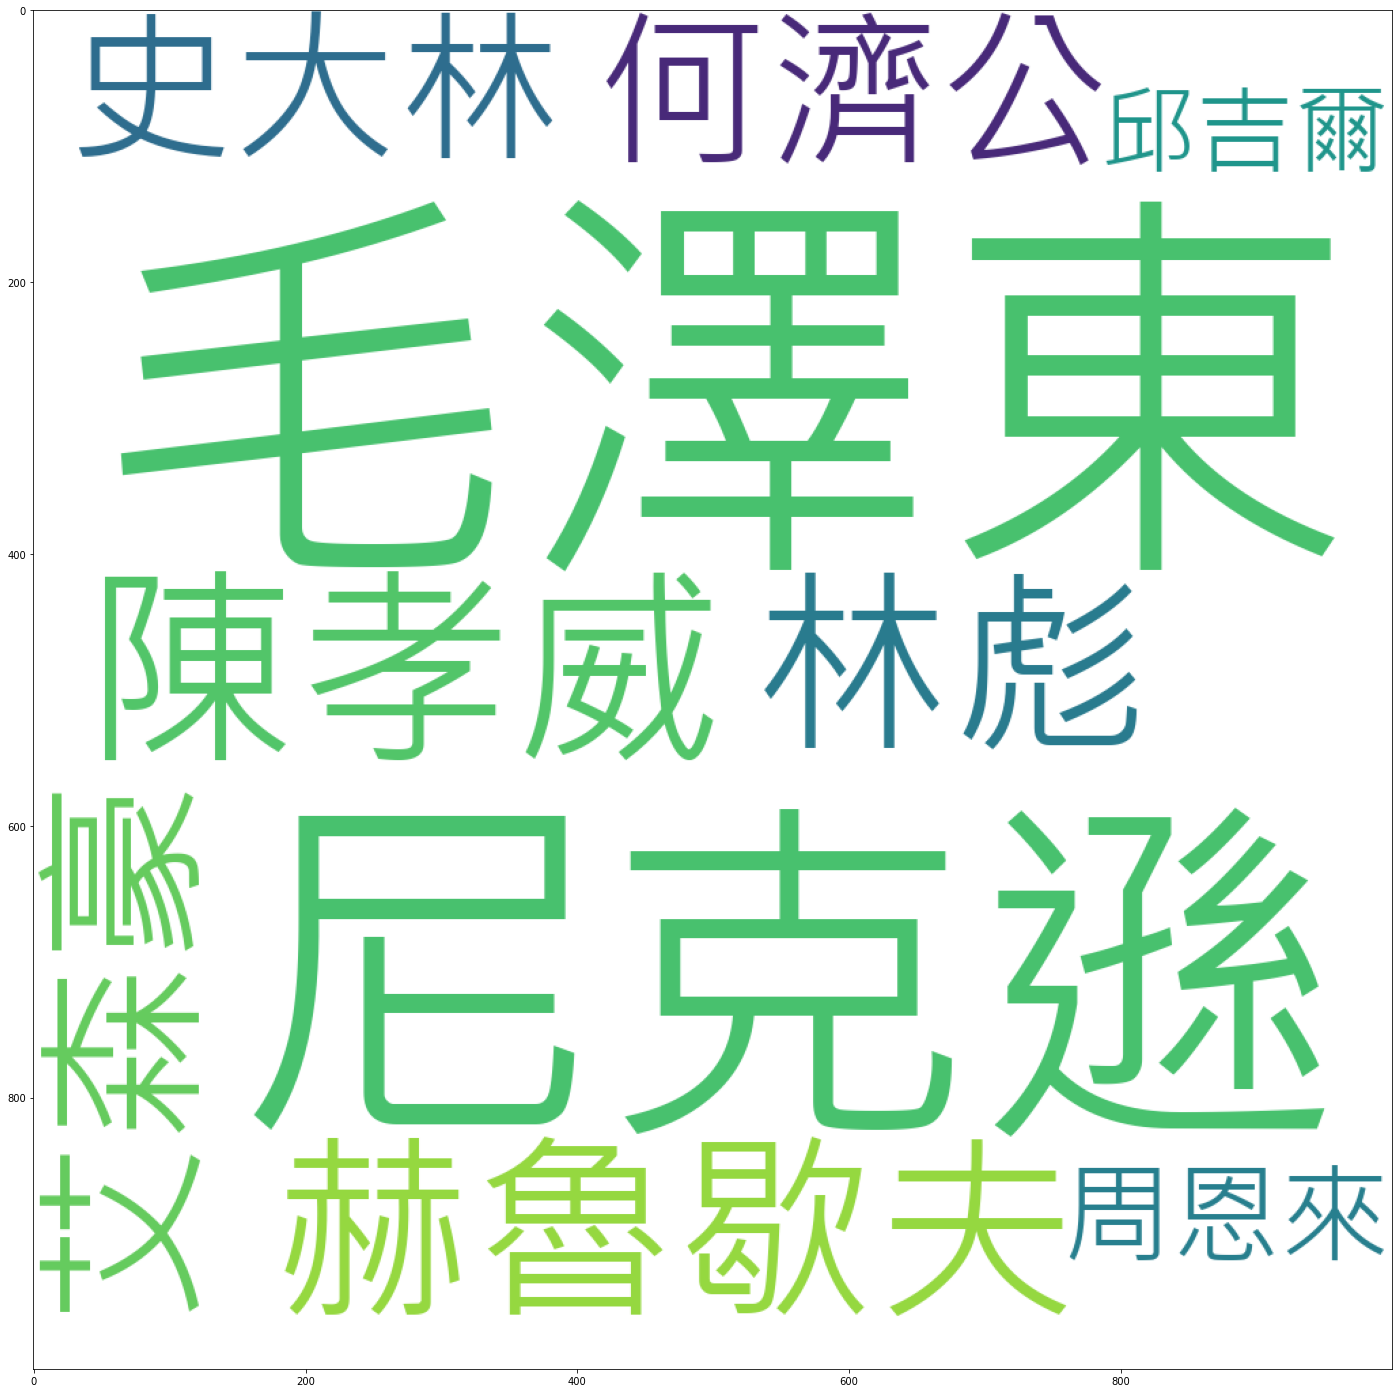

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
font = "msjh.ttc"

wc = WordCloud(font_path=font, background_color="white",width=1000,height=1000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(temp_type_gpe_dict)
plt.imshow(wc)

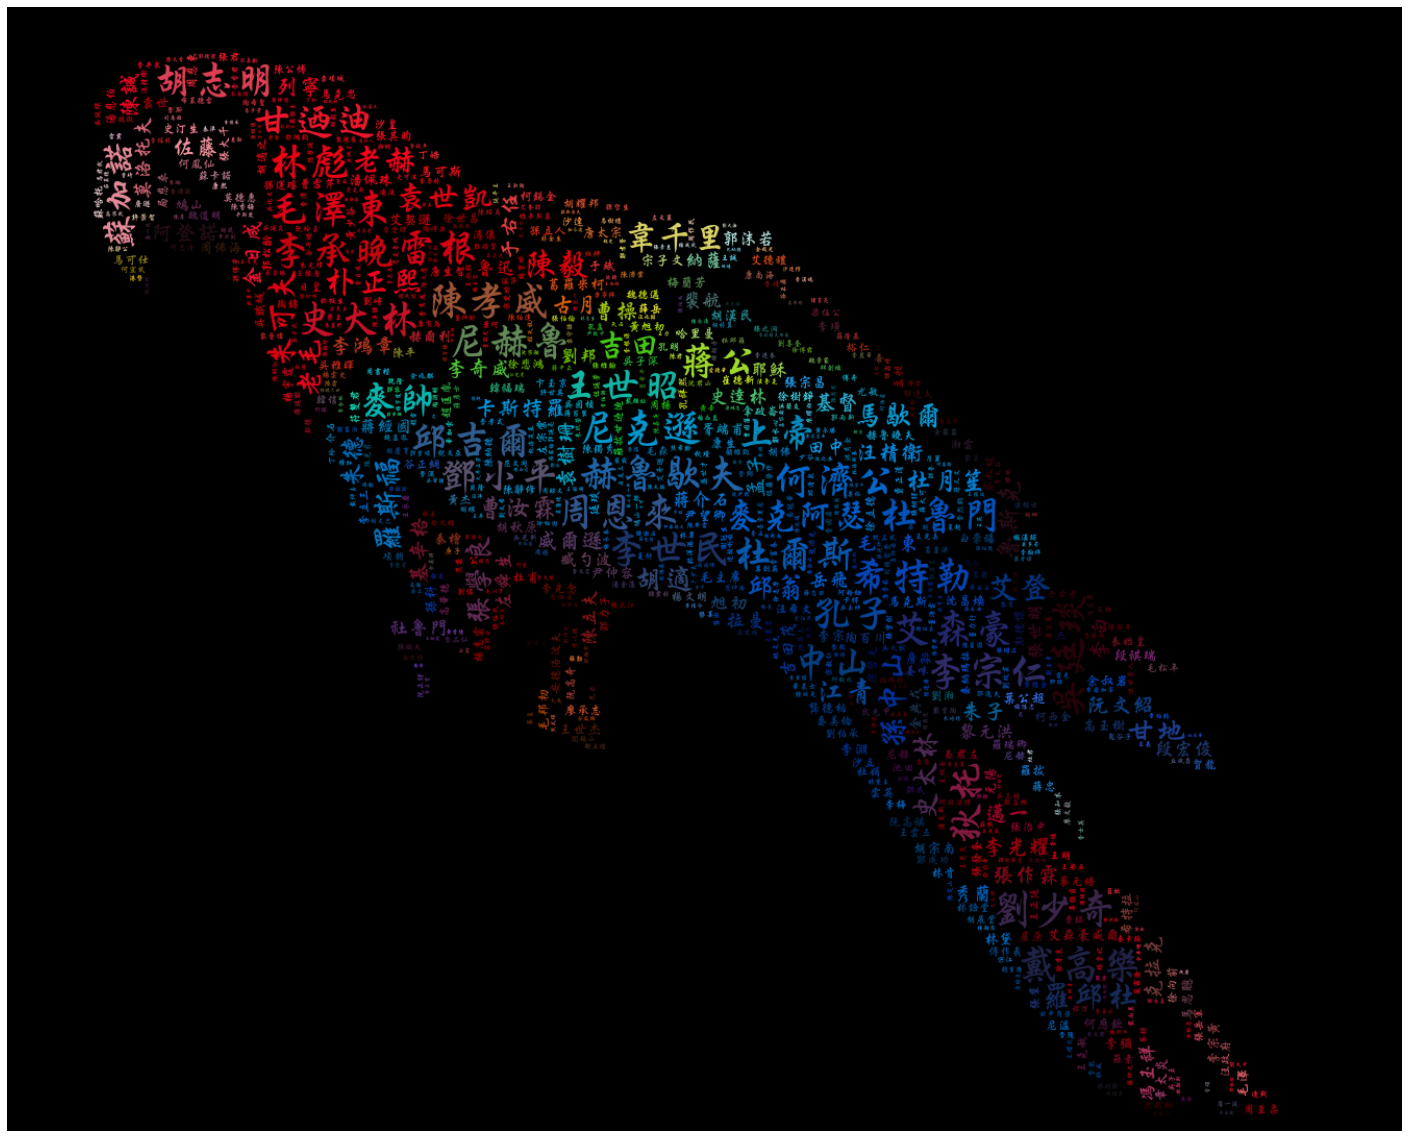

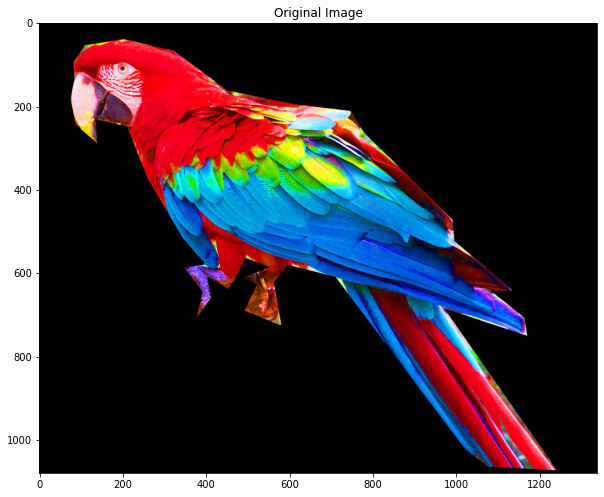

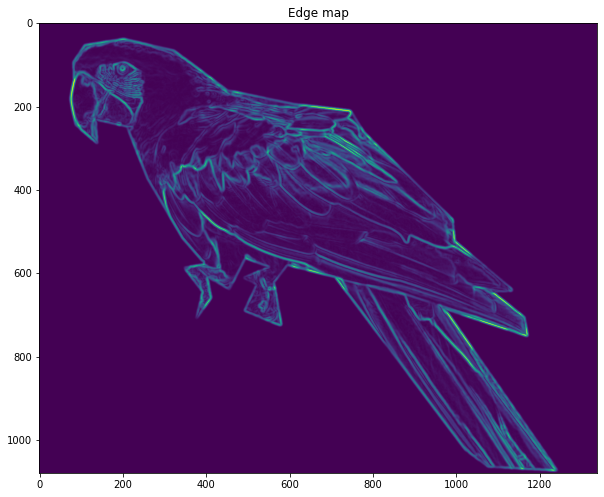

In [ ]:
import os
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_gradient_magnitude

from wordcloud import WordCloud, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = os.path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# load wikipedia text on rainbow
#text = open(os.path.join(d, 'wiki_rainbow.txt'), encoding="utf-8").read()

# load image. This has been modified in gimp to be brighter and have more saturation.
parrot_color = np.array(Image.open(os.path.join(d, "/content/parrot-by-jose-mari-gimenez2.jpg")))
# subsample by factor of 3. Very lossy but for a wordcloud we don't really care.
parrot_color = parrot_color[::3, ::3]

# create mask  white is "masked out"
parrot_mask = parrot_color.copy()
parrot_mask[parrot_mask.sum(axis=2) == 0] = 255

# some finesse: we enforce boundaries between colors so they get less washed out.
# For that we do some edge detection in the image
edges = np.mean([gaussian_gradient_magnitude(parrot_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
parrot_mask[edges > .08] = 255

# create wordcloud. A bit sluggish, you can subsample more strongly for quicker rendering
# relative_scaling=0 means the frequencies in the data are reflected less
# acurately but it makes a better picture
font_path = "w5font.ttc" 
wc = WordCloud(font_path = font_path, max_words=2000, mask=parrot_mask, max_font_size=40, random_state=42, relative_scaling=0)

# generate word cloud
wc.generate_from_frequencies(temp_type_gpe_dict)
#wc.generate(text)
plt.axis("off") 
plt.rcParams["figure.figsize"] = (25,25)
plt.imshow(wc)

# create coloring from image
image_colors = ImageColorGenerator(parrot_color)
wc.recolor(color_func=image_colors)

plt.axis("off") 

#plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
wc.to_file("parrot_new.png")

plt.figure(figsize=(10, 10))
plt.title("Original Image")
plt.imshow(parrot_color)

plt.figure(figsize=(10, 10))
plt.title("Edge map")
plt.imshow(edges)
plt.show()

RE-Organized ver

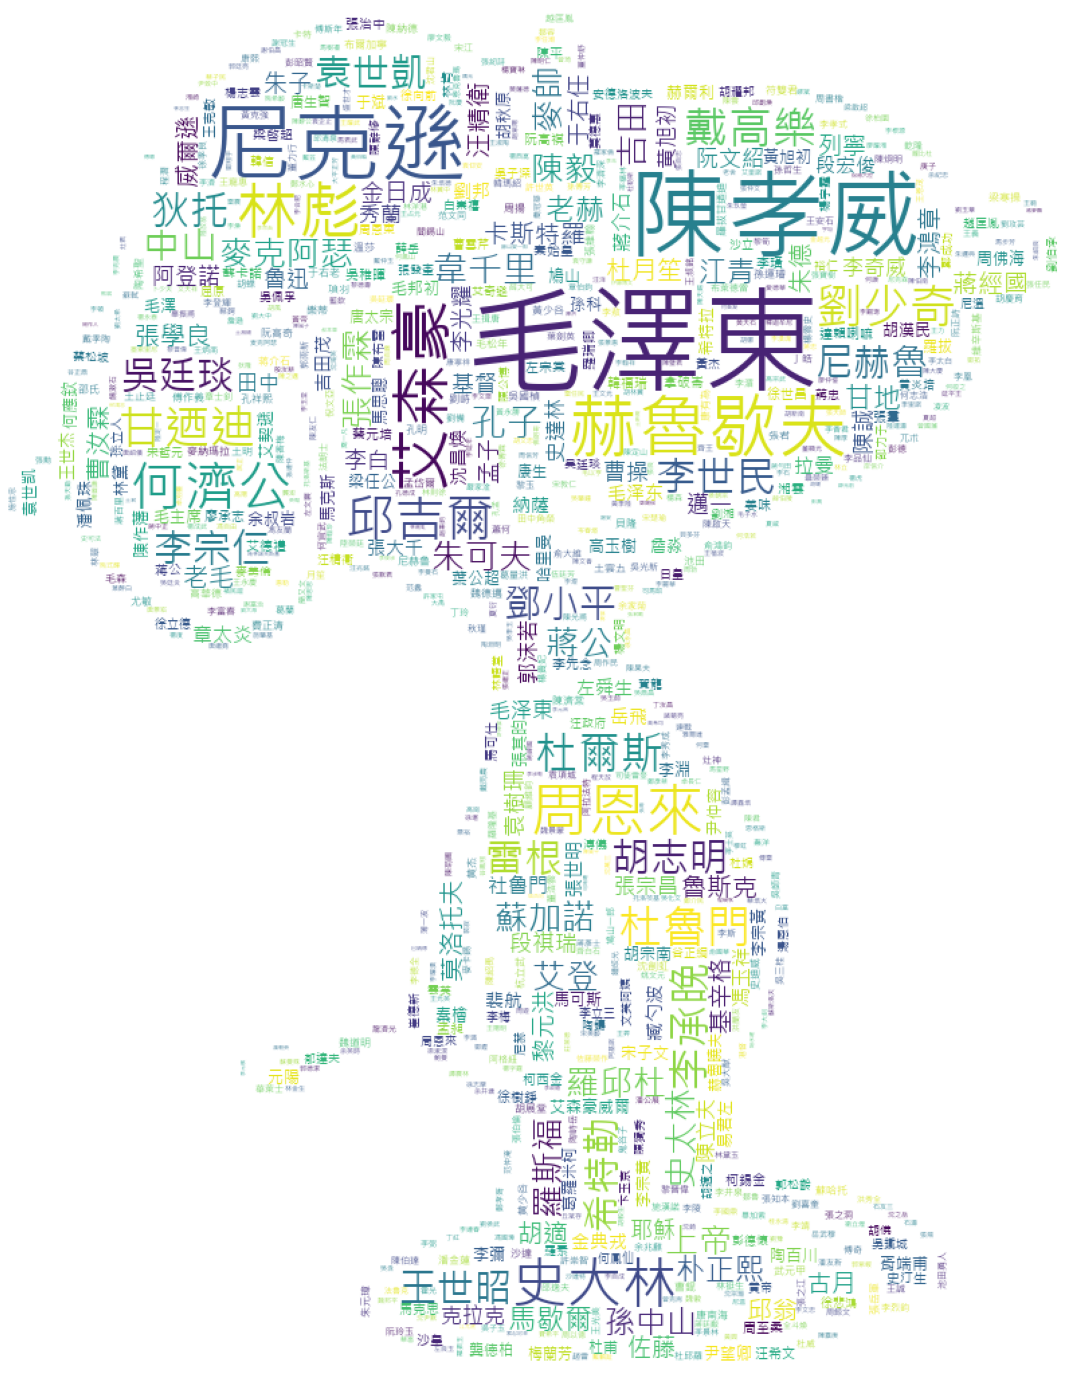

In [ ]:
# RE-Organized ver 
import numpy as np
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

font = "msjh.ttc"
icon_path = '/content/snoopy_PNG75.png'
icon = Image.open(icon_path)


mask= Image.new("RGB", icon.size, (1000, 1000, 1000))
mask.paste(icon,icon)
mask = np.array(mask)

wc = WordCloud(font_path = font, background_color = "white", max_words = None, mask = mask, random_state = 1)
wc.generate_from_frequencies(temp_type_gpe_dict)
image_colors = ImageColorGenerator(mask)
plt.axis("off") 
plt.rcParams["figure.figsize"] = (25,25)
plt.imshow(wc)








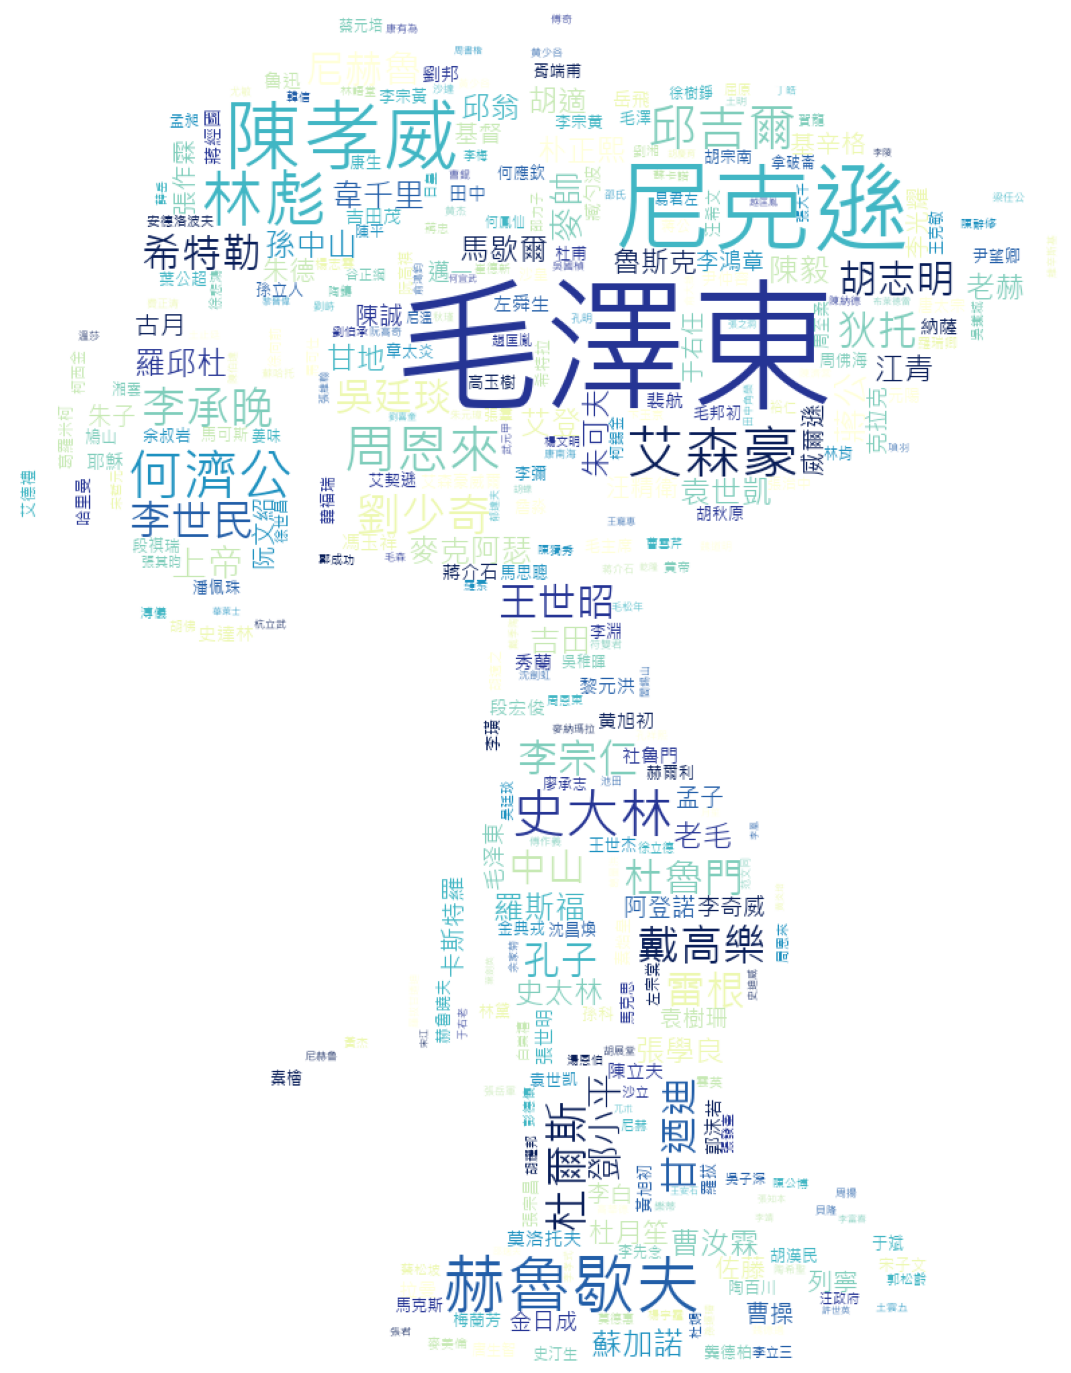

In [ ]:
# font = "SNsanafonGyou.ttf"
font = "msjh.ttc"
from PIL import Image
import numpy as np

icon_path = '/content/snoopy_PNG75.png'
icon = Image.open(icon_path)

# why use ICON?????
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)


import random
from palettable.colorbrewer.sequential import YlGnBu_9, BuPu_9, YlOrRd_9, PuBuGn_9, GnBu_9 # choose the color set you like
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(YlGnBu_9.colors[random.randint(0,8)]) # we got 9 colors, so we generate random number from 0 to 8


from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
wc = WordCloud(font_path=font, background_color="white", max_words=343,
                mask=mask, max_font_size=300, random_state=1)

# slot in the dictionary
wc.generate_from_frequencies(temp_type_gpe_dict)
wc.recolor(color_func=color_func, random_state=2)

# save as png
output_path = 'wordcloud1.png'
wc.to_file(output_path)

# display the word cloud
plt.rcParams["figure.figsize"] = (25,25)
plt.imshow(wc)
plt.axis("off")
plt.show()

#### Graphs and Charts

In [ ]:
from collections import OrderedDict
ordered_dict = OrderedDict(sorted(temp_type_gpe_dict.items(), key=lambda t: -t[1]))

<BarContainer object of 822 artists>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26481 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20811 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36956 missing from current font.
  font.set_

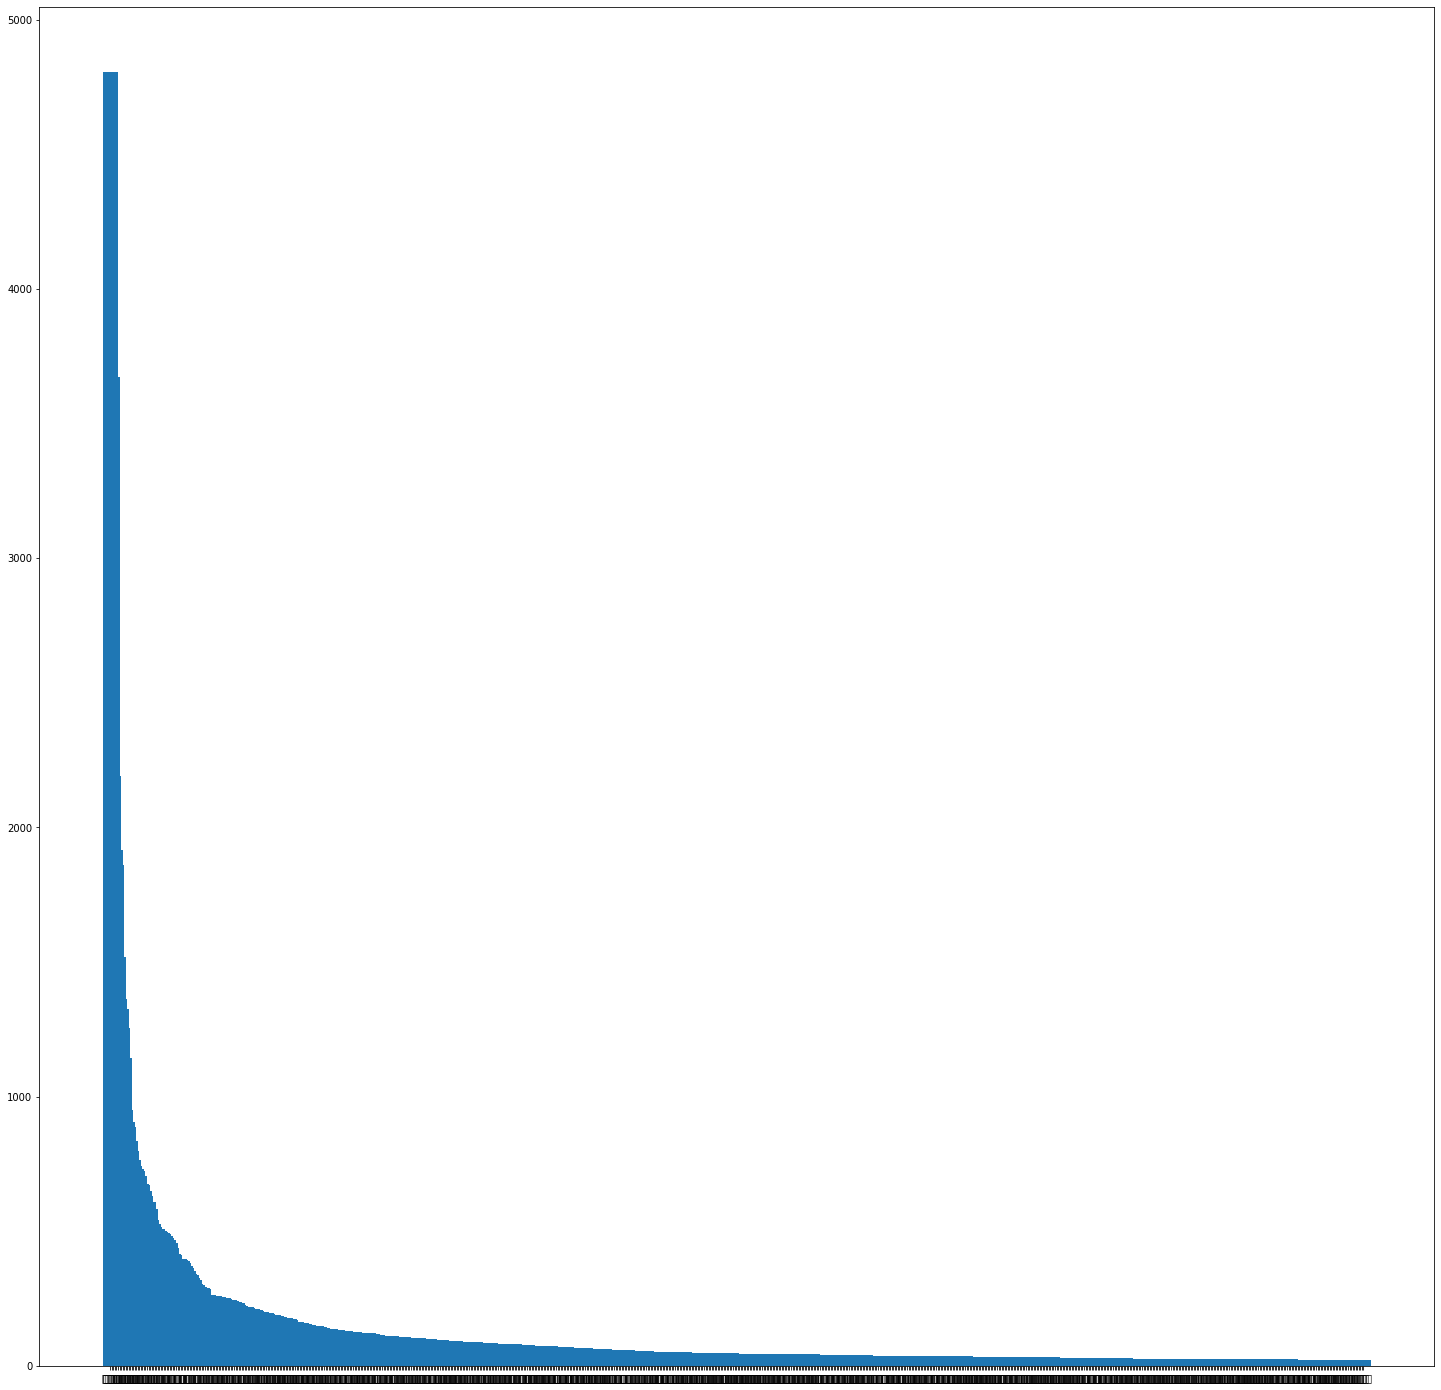

In [ ]:
import matplotlib as mpl

#fontP = fm.FontProperties()
#fontP.set_family('SimHei')
#fontP.set_size(14)

#plt.legend(loc=0, prop=fontP)

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']

plt.bar(ordered_dict.keys(), ordered_dict.values(), 10)


In [ ]:
import matplotlib.font_manager as fm
fm._rebuild()

In [ ]:
[f for f in fm.fontManager.ttflist]

[<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>,
 <Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>,
 <Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>,
 <Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>,
 <Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>,
 <Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal 700 normal>,
 <Font 'SimHei' (SimHei.ttf) normal normal 400 normal>,
 <Font 'Microsoft JhengHei' (msjh.ttc) normal normal 400 normal>,
 <Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>,
 <Font 'cmb10' (cmb10.ttf) normal normal 400 normal>,
 <Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>,
 <Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>,
 <Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>,
 <Font 'Microsoft JhengHei' (msjh.ttf) normal normal 400 normal>,
 <Font 'DejaVu Sans Mono' (DejaVuSansM

In [ ]:
for i in range(10):
  if fm.frontManager.ttflist in 

In [ ]:
import matplotlib
print(matplotlib.matplotlib_fname())



/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/matplotlibrc


In [ ]:
/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/msjh.ttf

cp NotoSansTC-Regular.otf /usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/NotoSansTC-Regular.otf

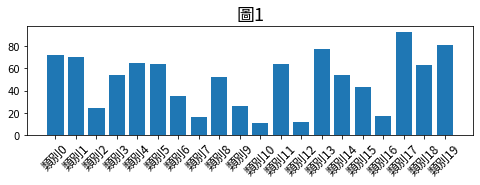

In [ ]:
import matplotlib.font_manager as fm
import random as random
fprop = fm.FontProperties(fname='/content/NotoSansTC-Regular.otf')

import matplotlib.pyplot as plt

# Prepare some data
x = list(range(20))
xticks = ["類別{:d}".format(i) for i in x]
y = [random.randint(10,99) for i in x]

# Plot the graph
plt.figure(figsize=(8, 2))
plt.bar(x, y)
plt.xticks(x, xticks, fontproperties=fprop, fontsize=12, rotation=45)
plt.title("圖1", fontproperties=fprop, fontsize=18)
plt.show()



In [ ]:
import pandas as pd
#df = pd.DataFrame(ordered_dict, columns=ordered_dict.keys(), orient='index')

#df = pd.DataFrame.from_dict(ordered_dict, orient='index')

df = pd.DataFrame(list(ordered_dict.items()))
df.columns = ['name', 'freq']
df

name  freq
0     毛澤東  6910
1     陳孝威  4500
2     尼克遜  3784
3    赫魯歇夫  2303
4     艾森豪  1940
..    ...   ...
827    凌雲    22
828    胡璉    22
829   陳質平    22
830    宇垣    22
831   王映霞    22

[832 rows x 2 columns]

In [ ]:
df[0:100]

name  freq
0    毛澤東  6910
1    陳孝威  4500
2    尼克遜  3784
3   赫魯歇夫  2303
4    艾森豪  1940
..   ...   ...
95    拉曼   220
96   段宏俊   219
97   馮玉祥   217
98   章太炎   217
99   蔣介石   213

[100 rows x 2 columns]

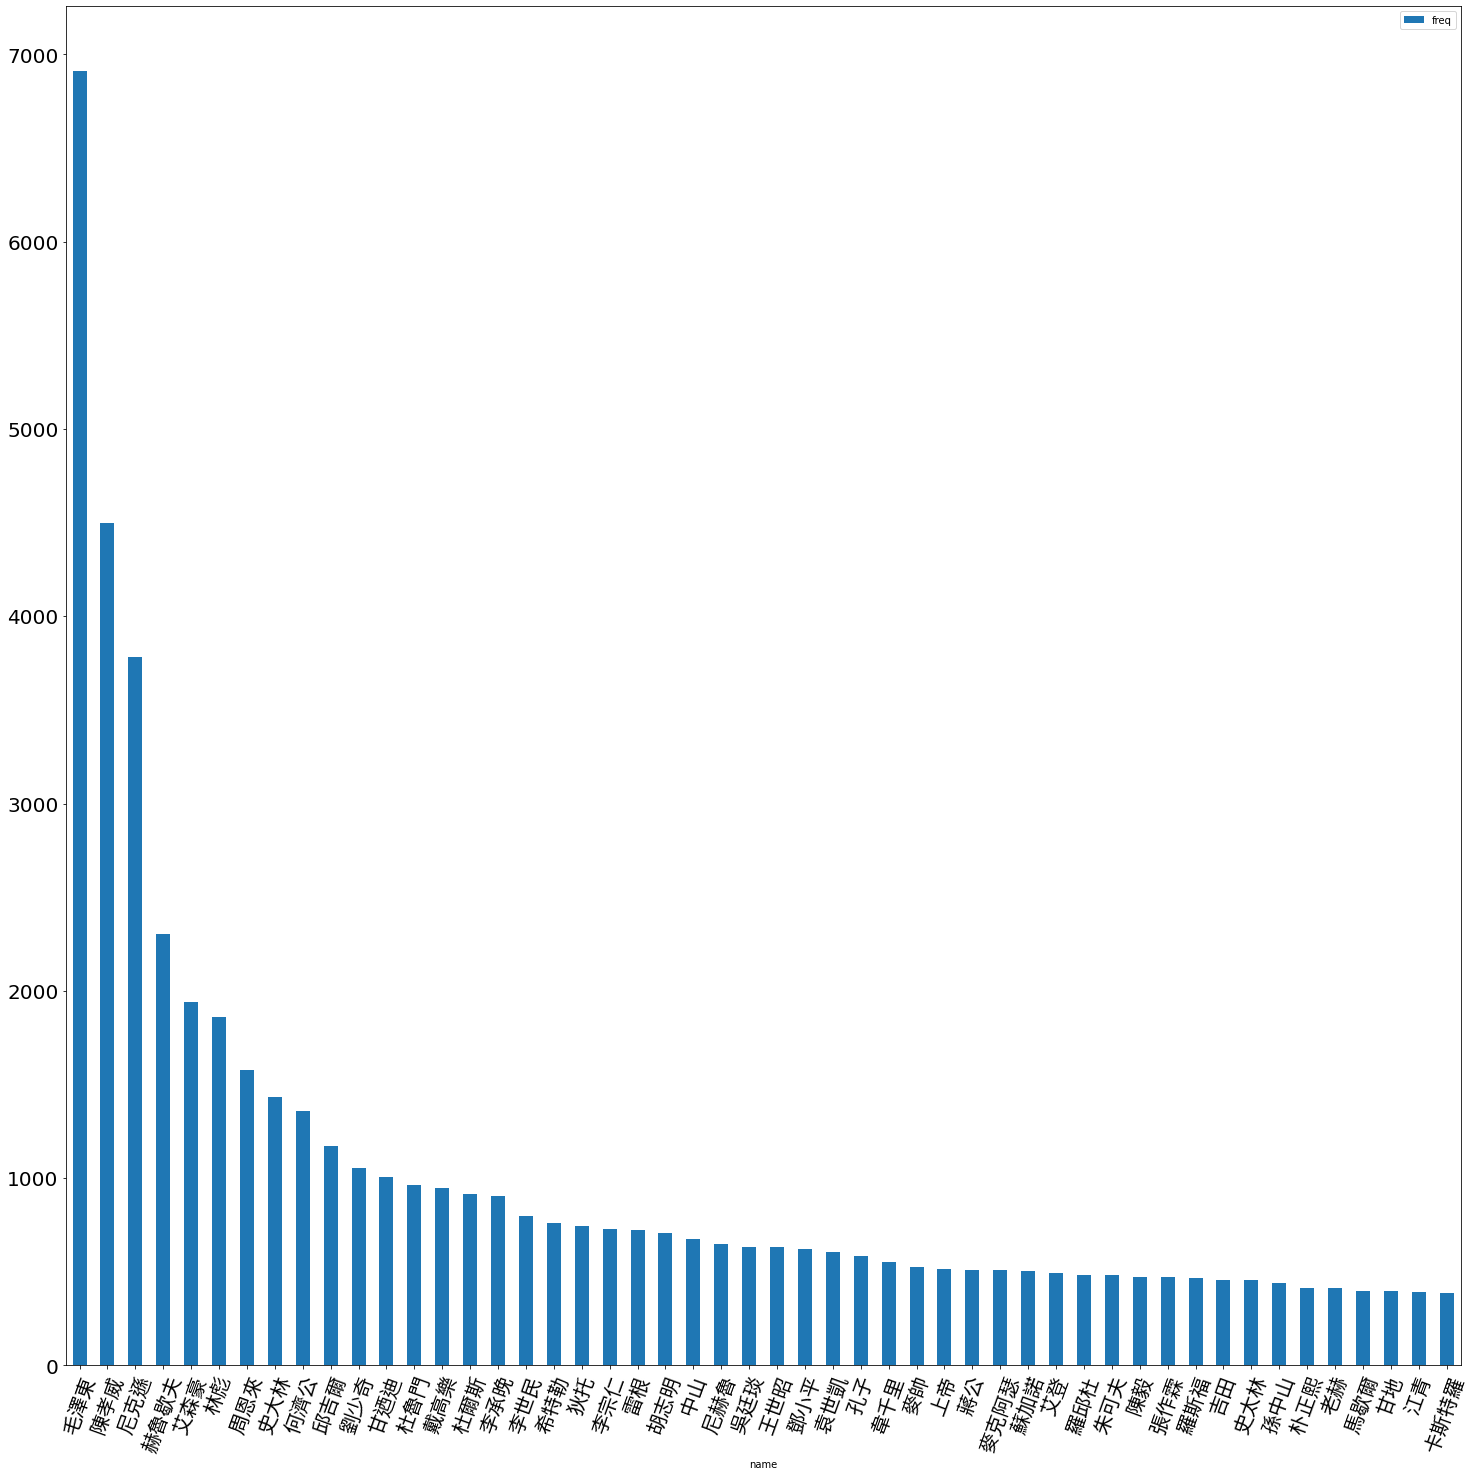

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# Draw a vertical bar chart
fprop = fm.FontProperties(fname='/content/NotoSansTC-Regular.otf')



length = 50

df_sliced = df[0:length]

df_sliced.plot.bar(x="name", y="freq", rot=70) # rot=50
#plt.suptitle('test title', fontsize=20)

xticks = list(df_sliced['name'])
x = [i for i in range(length)]
plt.xticks(x, xticks, fontproperties=fprop, fontsize=20) # rotation ='vertical'
plt.yticks(fontsize = 20, rotation ='horizontal')

# plt.figure(figsize=(8, 2))
plt.rcParams["figure.figsize"] = (25,25)
plt.show(block=True)

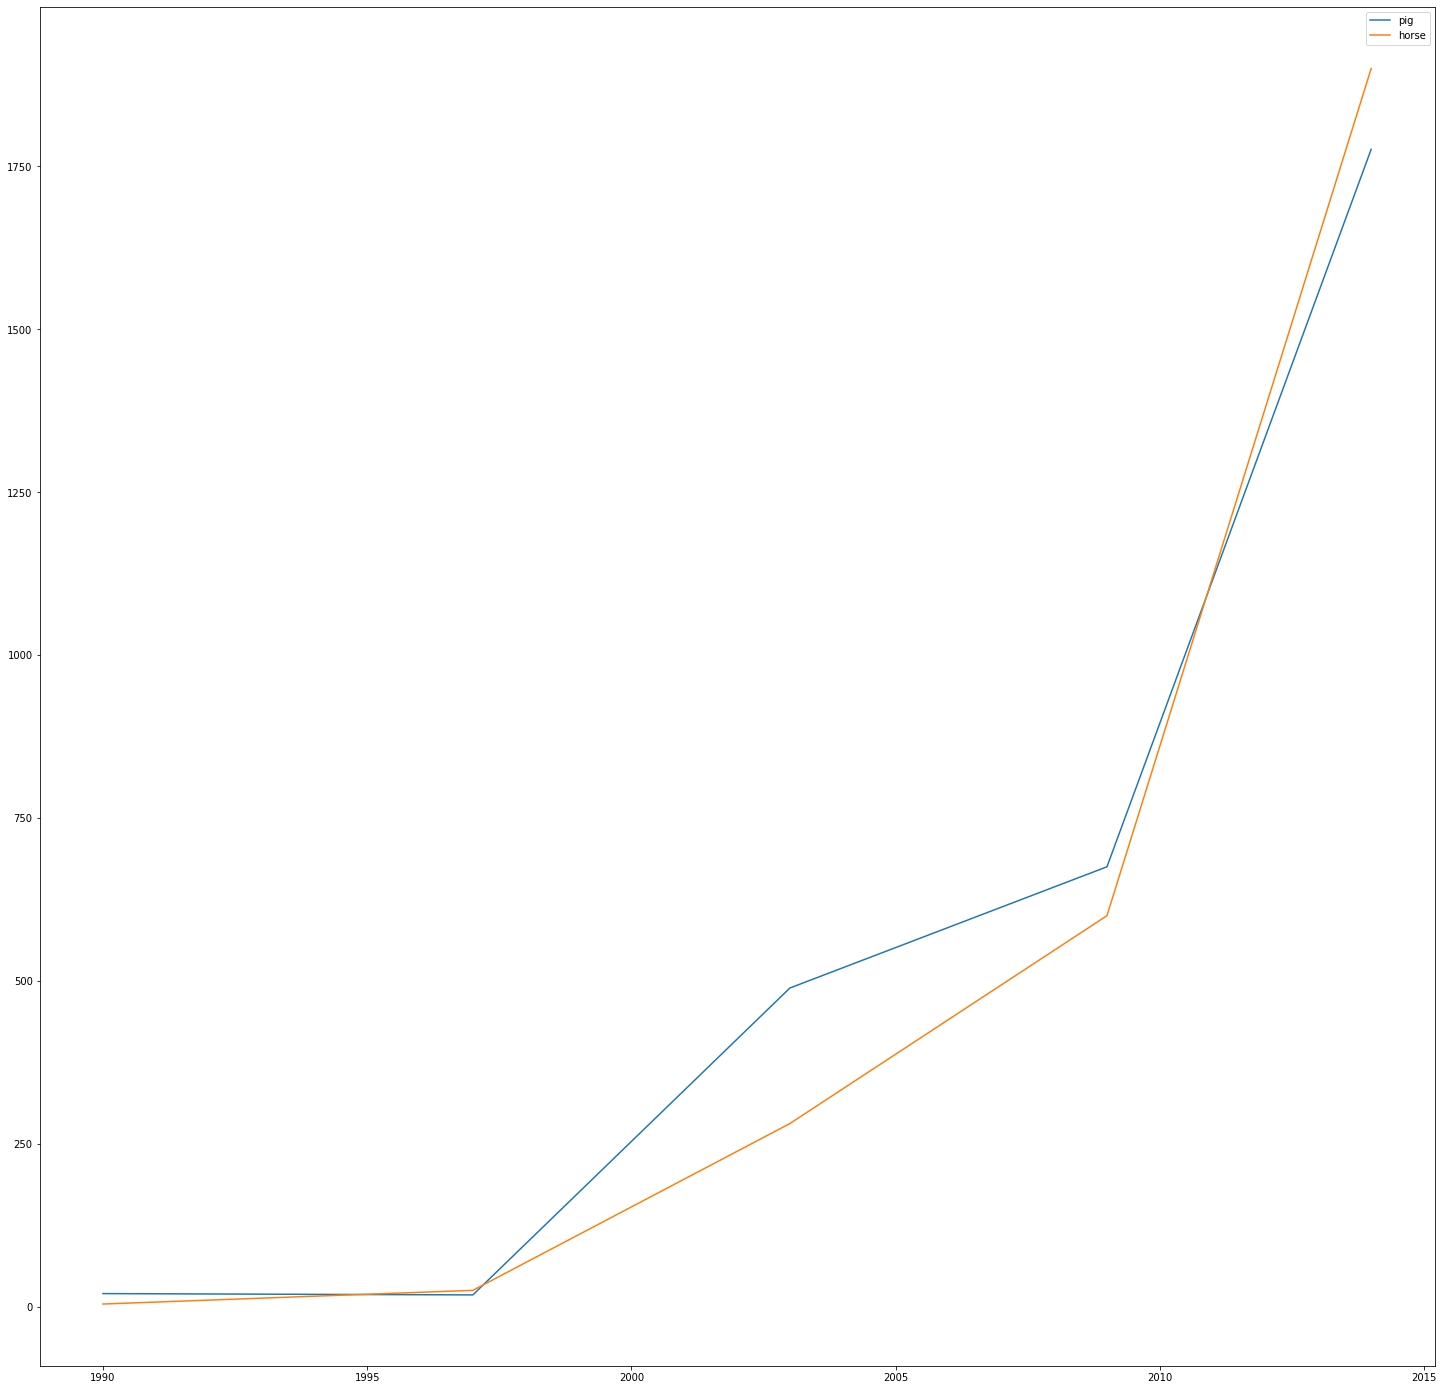

In [ ]:
# SAMPLE ~~~~~~~~~~~~~~~~~~~~~~~~~~
demo_df = pd.DataFrame({
   'pig': [20, 18, 489, 675, 1776],
   'horse': [4, 25, 281, 600, 1900]
   }, index=[1990, 1997, 2003, 2009, 2014])
lines = demo_df.plot.line()


numpy.ndarray

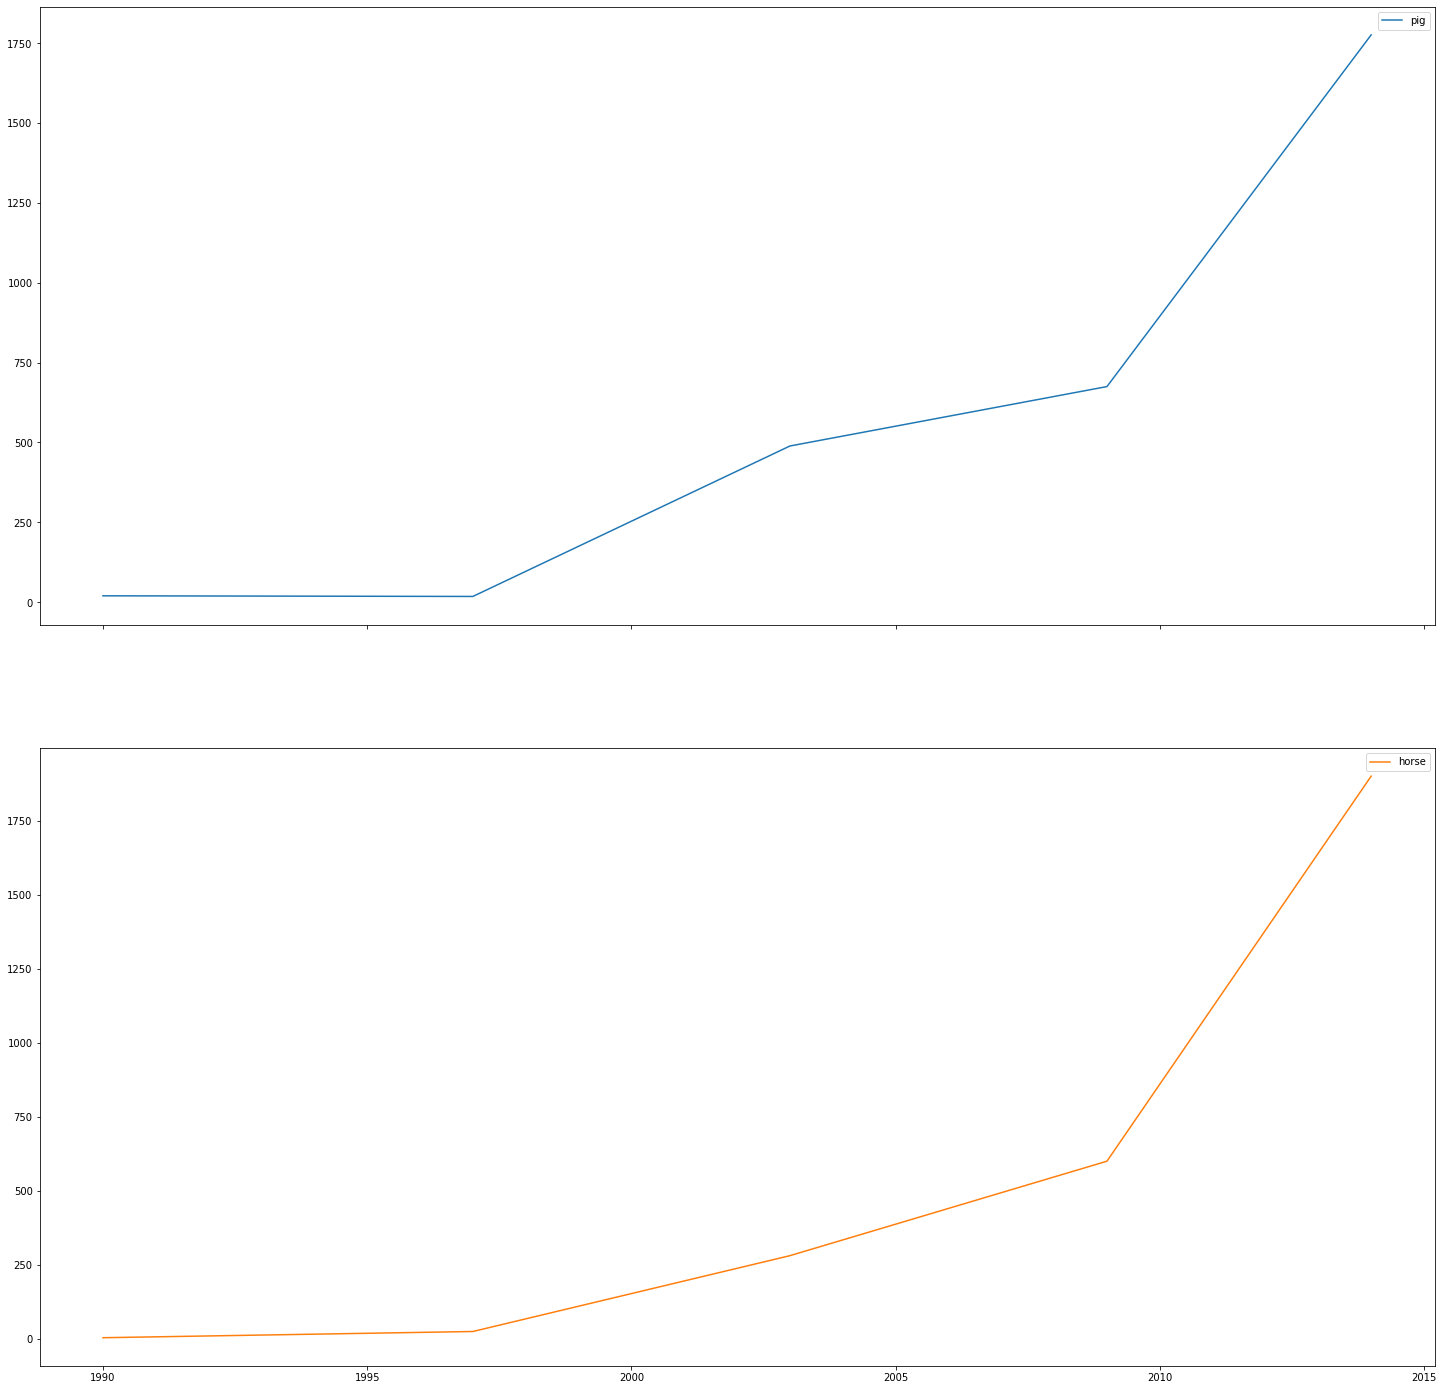

In [ ]:
# SAMPLE ~~~~~~~~
axes = demo_df.plot.line(subplots=True)
type(axes)

GET dataframe with attributes

In [ ]:
# Attributes: 
# column = NER_word
# first column = index of ymd 
# cell = frequency of occurrence


#1) Rearrange dataframe to ymd list, ner_word list, and frequency in cell 




# From:
# ymd_freq_dict = {ymd: {word: {ner_type: freq, ner_type: freq, ...}}}

# Goal: Get total freq of all PERSON
# nested_ner_dict = {ymd1: {ner_word1: freq, ner_word2: freq, ...}}


nested_ner_dict = dict()
type_to_filter = "GPE"

# Current Filters 
filter_list = GPE_list
filter_dict = {}

# for each loops
for ymd_key in ymd_freq_dict.keys():
  tmp_dict = dict()
  for ner_word in ymd_freq_dict[ymd_key].keys():
    for ner_type in ymd_freq_dict[ymd_key][ner_word].keys():

      

      # check validity 1) Type 2) ner_word exist in filter list
      if (ner_type == type_to_filter) and (ner_word in filter_list):

        if (ner_word not in filter_dict): #and (ner_word in list(df[0:10]['name'])):  # !!!!!!

          if ner_word not in tmp_dict:
            tmp_dict[ner_word] = ymd_freq_dict[ymd_key][ner_word][ner_type]
          else:
            tmp_dict[ner_word] = tmp_dict.get(ner_word, None) + ymd_freq_dict[ymd_key][ner_word][ner_type]
            # tmp_dict = {ner_word: freq, ner_word: freq, ...}

        elif (ner_word in filter_dict): # and (filter_dict[ner_word] in list(df[0:10]['name'])): # !!!!!!
          
          corrected_ner_word = filter_dict[ner_word]
          if corrected_ner_word not in tmp_dict:
            tmp_dict[corrected_ner_word] = ymd_freq_dict[ymd_key][ner_word][ner_type]
          else:
            tmp_dict[corrected_ner_word] = tmp_dict.get(corrected_ner_word, None) + ymd_freq_dict[ymd_key][ner_word][ner_type]

  if ymd_key not in nested_ner_dict:
    nested_ner_dict[ymd_key] = tmp_dict


        















In [ ]:
nested_ner_dict

{'19501009': {'上海': 2,
  '中': 5,
  '以': 1,
  '倫敦': 3,
  '北京': 5,
  '北韓': 1,
  '南京': 3,
  '印度': 4,
  '台北': 1,
  '台灣': 1,
  '大陸': 1,
  '抗日': 1,
  '日本': 8,
  '曼谷': 3,
  '朝鮮': 3,
  '柬京': 2,
  '柬北': 1,
  '法': 2,
  '法國': 1,
  '泰': 2,
  '泰國': 2,
  '港': 2,
  '湖南': 1,
  '美': 3,
  '美國': 9,
  '英': 10,
  '莫斯科': 1,
  '蘇': 1,
  '蘇聯': 1,
  '越南': 2,
  '遼東': 1,
  '韓': 1,
  '香港': 6},
 '19501013': {'上海': 1,
  '中': 2,
  '中國': 6,
  '中國大陸': 2,
  '俄': 1,
  '北京': 6,
  '北韓': 1,
  '南京': 4,
  '台': 1,
  '台北': 2,
  '台灣': 7,
  '天津': 1,
  '川': 1,
  '抗日': 1,
  '新疆': 4,
  '日': 4,
  '日本': 12,
  '柬': 1,
  '柬京': 2,
  '江西': 1,
  '浙江': 1,
  '湖南': 1,
  '紐約': 1,
  '美': 4,
  '美國': 11,
  '莫斯科': 1,
  '蘇': 1,
  '蘇聯': 1,
  '西藏': 6,
  '韓': 3,
  '香港': 7},
 '19501016': {'上海': 3,
  '中': 2,
  '中國': 7,
  '俄': 2,
  '倫敦': 1,
  '北京': 6,
  '北韓': 2,
  '南京': 2,
  '印度': 1,
  '台': 1,
  '台北': 2,
  '台灣': 8,
  '台灣省': 1,
  '川': 3,
  '巴黎': 1,
  '德': 1,
  '成都': 1,
  '抗日': 1,
  '新疆': 1,
  '日': 3,
  '日本': 20,
  '柬': 3,
  '柬京': 2,
  '法國': 2,
  '浙江': 1,

In [ ]:
# nested_dict to dataframe

nest_dict_df = pd.DataFrame.from_dict({(i): nested_ner_dict[i]
                           for i in nested_ner_dict.keys() },
                       orient='index',dtype=int) #orient='index',

In [ ]:
nest_dict_df #.convert_dtypes(convert_integer=True)

美國    日本   朝鮮    中    蘇    以    香港   抗日   上海   台北  ...  澳洲   台湾  \
19501009   9.0   8.0  3.0  5.0  1.0  1.0   6.0  1.0  2.0  1.0  ... NaN  NaN   
19501013  11.0  12.0  NaN  2.0  1.0  NaN   7.0  1.0  1.0  2.0  ... NaN  NaN   
19501016  18.0  20.0  NaN  2.0  2.0  NaN   3.0  1.0  3.0  2.0  ... NaN  NaN   
19501019   9.0   1.0  NaN  2.0  NaN  NaN   7.0  NaN  1.0  2.0  ... NaN  NaN   
19501023   7.0   2.0  5.0  1.0  NaN  NaN   5.0  NaN  4.0  2.0  ... NaN  NaN   
...        ...   ...  ...  ...  ...  ...   ...  ...  ...  ...  ...  ..  ...   
19830504   NaN   NaN  NaN  NaN  NaN  4.0   3.0  NaN  2.0  3.0  ... NaN  2.0   
19540128   NaN   NaN  NaN  NaN  NaN  NaN   1.0  NaN  NaN  NaN  ... NaN  NaN   
19620720   NaN   NaN  NaN  NaN  NaN  NaN   2.0  NaN  NaN  2.0  ... NaN  NaN   
19630226   NaN   NaN  NaN  NaN  NaN  NaN   5.0  NaN  5.0  NaN  ... NaN  NaN   
19830625   NaN   NaN  NaN  NaN  NaN  NaN  23.0  NaN  2.0  8.0  ... NaN  1.0   

          台北市   印尼  十靈丹  以色列   南越    毛   北越  寮國  
19501009  NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  
19501013  NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  
19501016  NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  
19501019  NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  
19501023  NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  
...       ...  ...  ...  ...  ...  ...  ...  ..  
19830504  1.0  NaN  NaN  4.0  NaN  NaN  NaN NaN  
19540128  NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  
19620720  NaN  NaN  1.0  NaN  NaN  NaN  NaN NaN  
19630226  NaN  1.0  1.0  NaN  1.0  1.0  1.0 NaN  
19830625  NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  

[3250 rows x 109 columns]

In [ ]:
columns_title = list(nest_dict_df.columns.values)

In [ ]:
columns_title

['周恩來', '陳孝威', '毛澤東', '林彪', '艾森豪', '史大林', '赫魯歇夫', '邱吉爾', '尼克遜', '何濟公']

In [ ]:
index_nest_dict_df = nest_dict_df.reset_index()

In [ ]:
index_nest_dict_df

index  周恩來  陳孝威  毛澤東   林彪  艾森豪  史大林  赫魯歇夫  邱吉爾  尼克遜  何濟公
0     19501009  4.0  1.0  6.0  6.0  NaN  NaN   NaN  NaN  NaN  NaN
1     19501104  1.0  1.0  5.0  1.0  NaN  1.0   NaN  NaN  NaN  NaN
2     19501116  1.0  NaN  NaN  6.0  NaN  NaN   NaN  NaN  NaN  NaN
3     19501122  5.0  1.0  3.0  4.0  NaN  NaN   NaN  NaN  NaN  NaN
4     19501126  3.0  2.0  4.0  1.0  NaN  NaN   NaN  NaN  NaN  NaN
...        ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  ...
3046  19660526  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  1.0
3047  19680310  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  3.0
3048  19691220  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  1.0
3049  19700202  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  1.0
3050  19700628  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  1.0

[3051 rows x 11 columns]

In [ ]:
def ymd_to_date(ymd):
  return ymd[:4] + '-' + ymd[4:6] + '-' + ymd[6:]
index_nest_dict_df['index'] = index_nest_dict_df['index'].apply(ymd_to_date)

In [ ]:
index_nest_dict_df = index_nest_dict_df.rename({"ymd": "Datetime"}, axis=1)

In [ ]:
index_nest_dict_df

index  周恩來  陳孝威  毛澤東   林彪  艾森豪  史大林  赫魯歇夫  邱吉爾  尼克遜  何濟公
0     1950-10-09  4.0  1.0  6.0  6.0  NaN  NaN   NaN  NaN  NaN  NaN
1     1950-11-04  1.0  1.0  5.0  1.0  NaN  1.0   NaN  NaN  NaN  NaN
2     1950-11-16  1.0  NaN  NaN  6.0  NaN  NaN   NaN  NaN  NaN  NaN
3     1950-11-22  5.0  1.0  3.0  4.0  NaN  NaN   NaN  NaN  NaN  NaN
4     1950-11-26  3.0  2.0  4.0  1.0  NaN  NaN   NaN  NaN  NaN  NaN
...          ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  ...
3046  1966-05-26  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  1.0
3047  1968-03-10  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  3.0
3048  1969-12-20  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  1.0
3049  1970-02-02  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  1.0
3050  1970-06-28  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  1.0

[3051 rows x 11 columns]

In [ ]:
index_nest_dict_df.to_excel("plot_test001.xlsx", index=False)

In [ ]:
# SAMPLE!~~~~~~~


import pandas as pd

# Sample data which will be used
# to create the dataframe
sample_timeseries_data = {

	'Date': ['2020-01-25', '2020-02-25',
			'2020-03-25', '2020-04-25',
			'2020-05-25', '2020-06-25',
			'2020-07-25', '2020-08-25',
			'2020-09-25', '2020-10-25',
			'2020-11-25', '2020-12-25',
			'2021-01-25', '2021-02-25',
			'2021-03-25', '2021-04-25'],

	'A': [102, 114, 703, 547,
		641, 669, 897, 994,
		1002, 974, 899, 954,
		1105, 1189, 1100, 934],

	'B': [1029, 1178, 723, 558,
		649, 669, 899, 1000,
		1012, 984, 918, 959,
		1125, 1199, 1109, 954],

	'C': [634, 422,152, 23,
		294, 1452, 891, 990,
		924, 960, 874, 548,
		174, 49, 655, 914],

	'D': [1296, 7074, 3853, 4151,
		2061, 1478, 2061, 3853,
		6379, 2751, 1064, 6263,
		2210, 6566, 3918, 1121],

	'E': [10, 17, 98, 96,
		85, 89, 90, 92,
		86, 84, 78, 73,
		71, 65, 70, 60]
}

# Creating a dataframe using pandas
# module with Date, A, B, C, D and E
# as columns.
dataframe = pd.DataFrame(
sample_timeseries_data,columns=[
	'Date', 'A', 'B', 'C', 'D', 'E'])

# Changing the datatype of Date, from
# Object to datetime64
dataframe["Date"] = dataframe["Date"].astype("datetime64")

# Setting the Date as index
dataframe = dataframe.set_index("Date")
dataframe


A     B     C     D   E
Date                                  
2020-01-25   102  1029   634  1296  10
2020-02-25   114  1178   422  7074  17
2020-03-25   703   723   152  3853  98
2020-04-25   547   558    23  4151  96
2020-05-25   641   649   294  2061  85
2020-06-25   669   669  1452  1478  89
2020-07-25   897   899   891  2061  90
2020-08-25   994  1000   990  3853  92
2020-09-25  1002  1012   924  6379  86
2020-10-25   974   984   960  2751  84
2020-11-25   899   918   874  1064  78
2020-12-25   954   959   548  6263  73
2021-01-25  1105  1125   174  2210  71
2021-02-25  1189  1199    49  6566  65
2021-03-25  1100  1109   655  3918  70
2021-04-25   934   954   914  1121  60

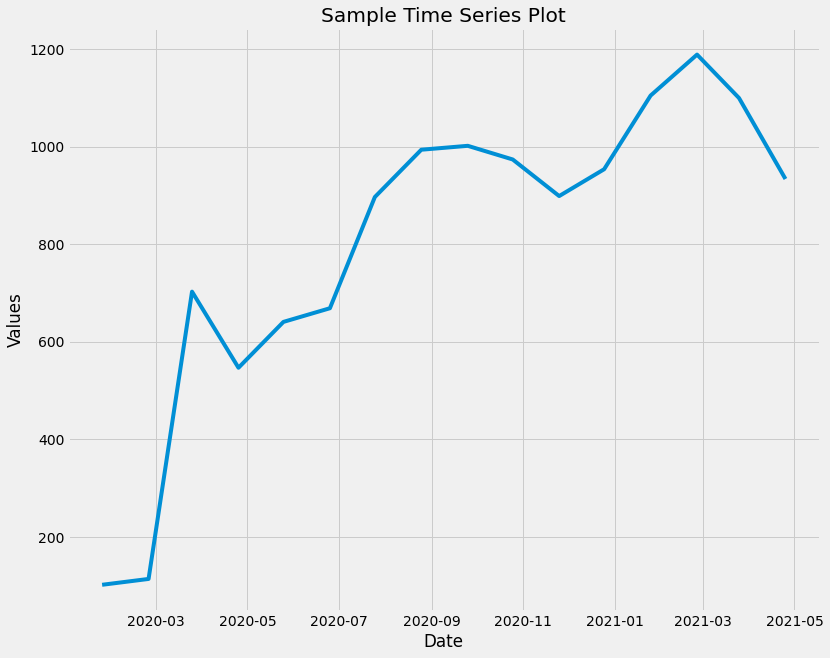

In [ ]:
# SAMPLE!!~~~~~~~~~~~


import matplotlib.pyplot as plt

# Using a inbuilt style to change
# the look and feel of the plot
plt.style.use("fivethirtyeight")

# setting figure size to 12, 10
plt.figure(figsize=(12, 10))

# Labelling the axes and setting
# a title
plt.xlabel("Date")
plt.ylabel("Values")
plt.title("Sample Time Series Plot")

# plotting the "A" column alone
plt.plot(dataframe["A"])


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21608 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24681 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20358 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38515 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23389 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23041 missing from current font.
  font.set_

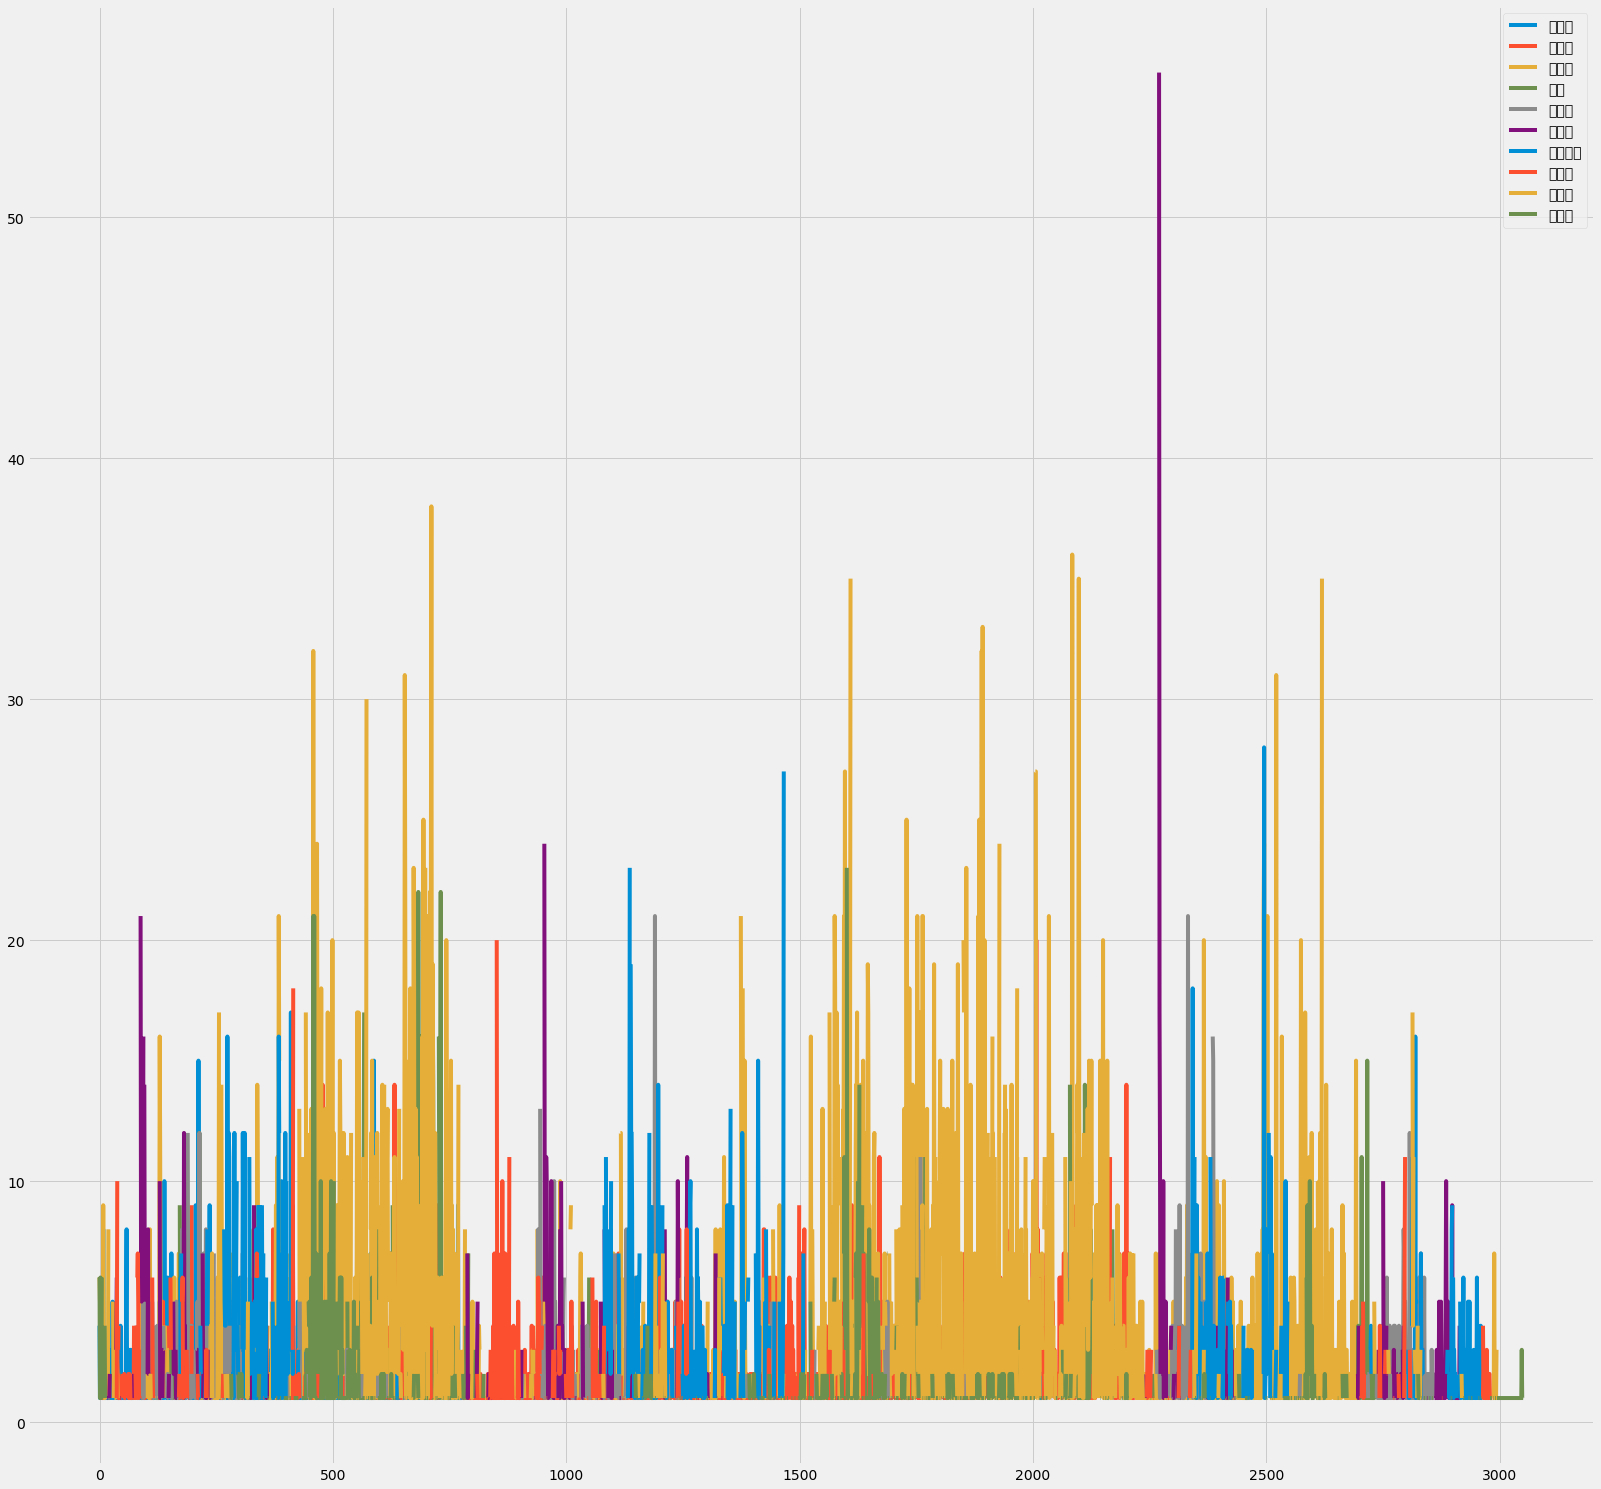

In [ ]:
index_nest_dict_df.plot()

In [ ]:
index_nest_dict_df

index  周恩來  陳孝威  毛澤東   林彪  艾森豪  史大林  赫魯歇夫  邱吉爾  尼克遜  何濟公
0     1950-10-09  4.0  1.0  6.0  6.0  NaN  NaN   NaN  NaN  NaN  NaN
1     1950-11-04  1.0  1.0  5.0  1.0  NaN  1.0   NaN  NaN  NaN  NaN
2     1950-11-16  1.0  NaN  NaN  6.0  NaN  NaN   NaN  NaN  NaN  NaN
3     1950-11-22  5.0  1.0  3.0  4.0  NaN  NaN   NaN  NaN  NaN  NaN
4     1950-11-26  3.0  2.0  4.0  1.0  NaN  NaN   NaN  NaN  NaN  NaN
...          ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  ...
3046  1966-05-26  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  1.0
3047  1968-03-10  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  3.0
3048  1969-12-20  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  1.0
3049  1970-02-02  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  1.0
3050  1970-06-28  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  1.0

[3051 rows x 11 columns]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21608 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24681 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20358 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38515 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23389 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23041 missing from current font.
  font.set_

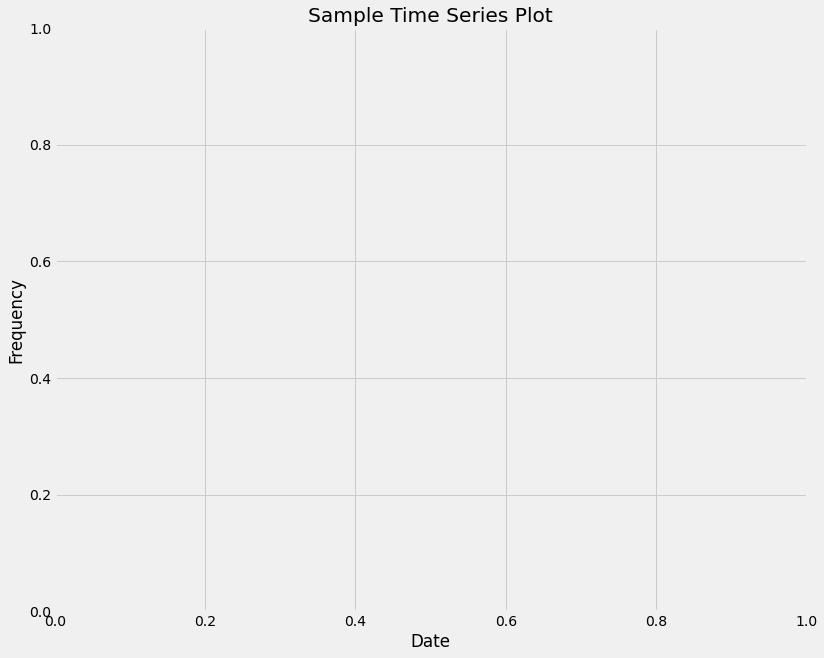

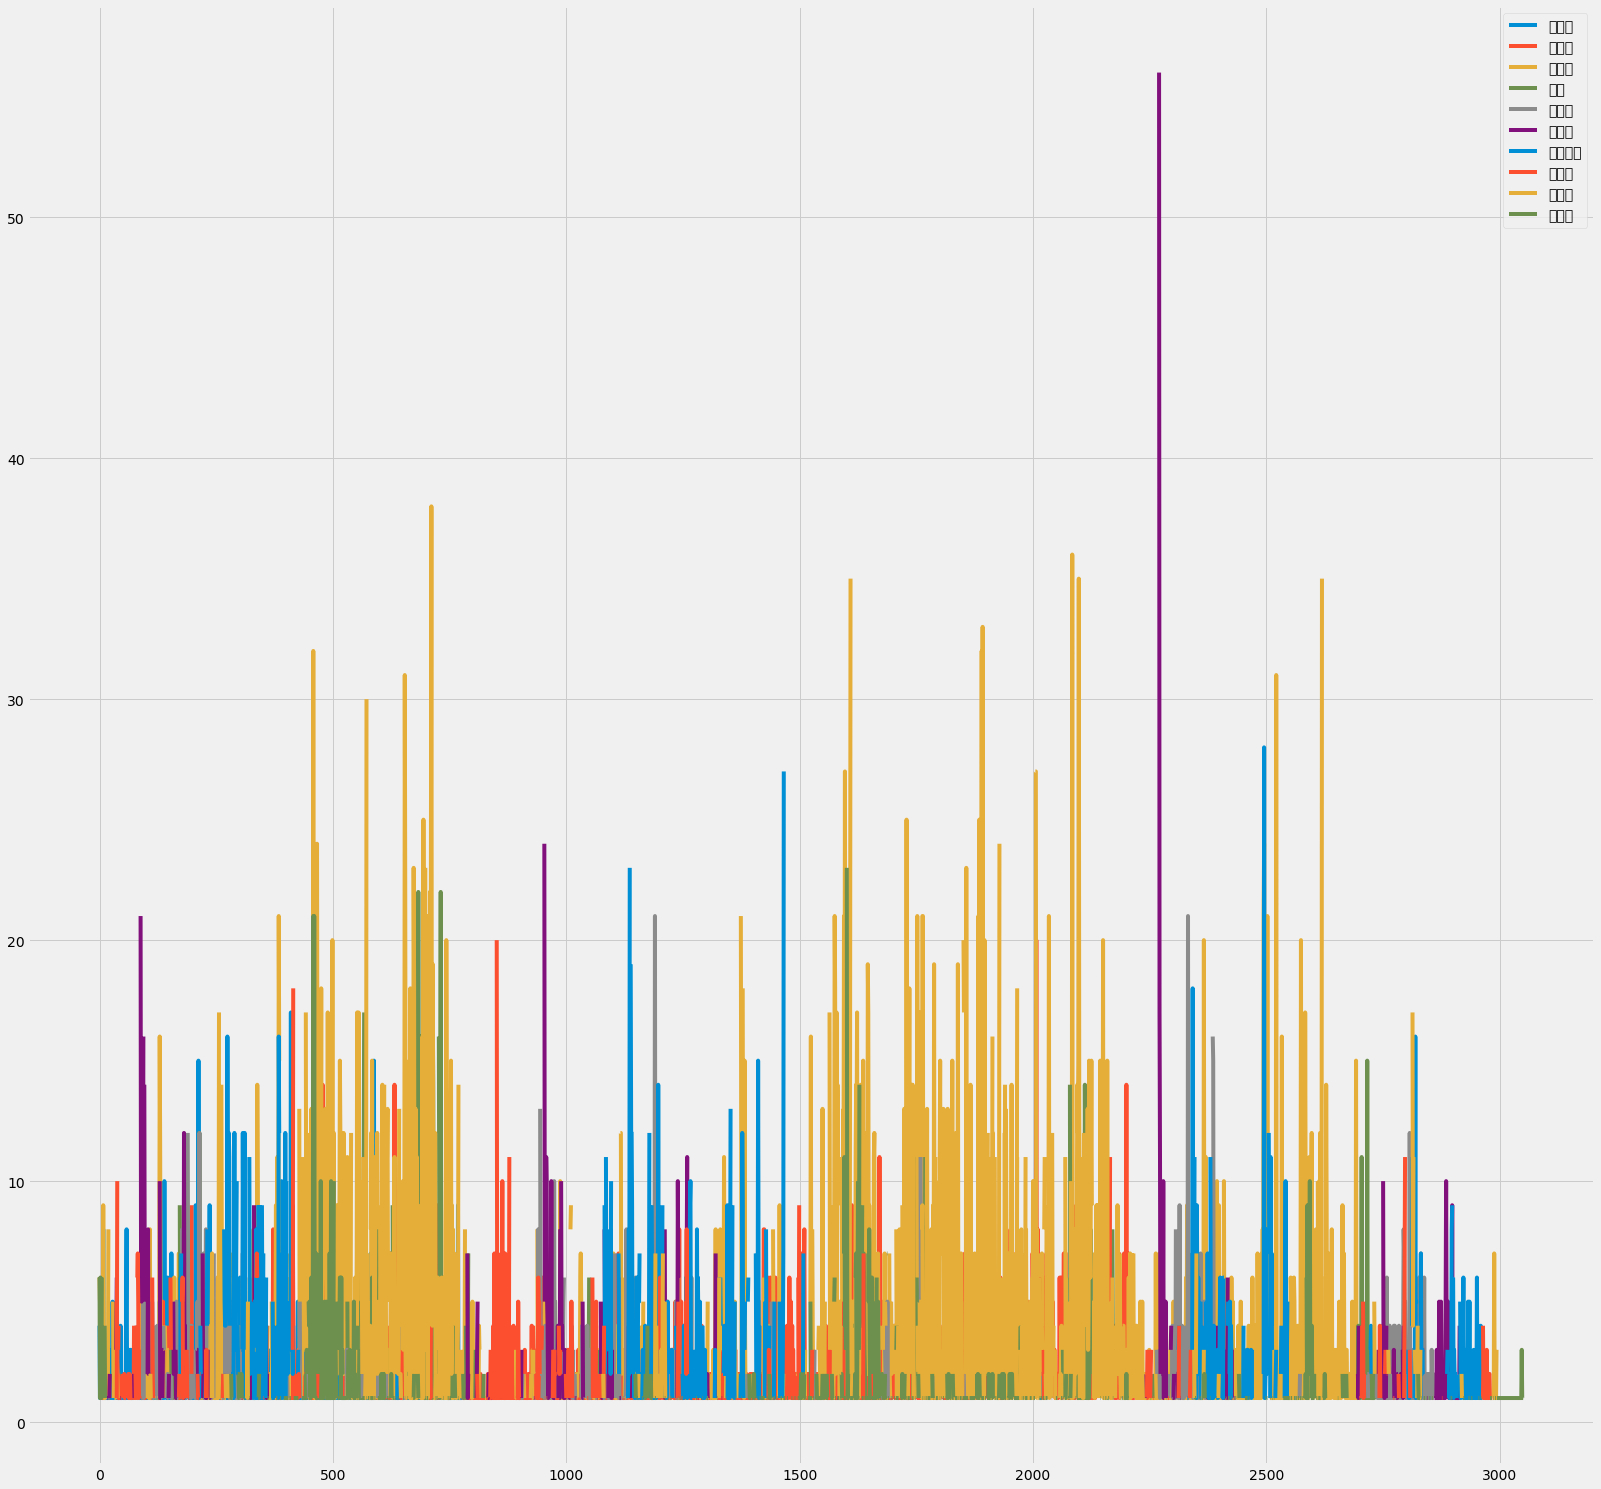

In [ ]:

import matplotlib.pyplot as plt
 
# Using a inbuilt style to change
# the look and feel of the plot
plt.style.use("fivethirtyeight")
 
# setting figure size to 12, 10
plt.figure(figsize=(12, 10))
 
# Labelling the axes and setting
# a title
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.title("Sample Time Series Plot")
 
# plotting the "A" column alone
index_nest_dict_df.plot()

In [ ]:
import datetime

In [ ]:
index_nest_dict_df['Datetime'] = pd.to_datetime(index_nest_dict_df['Datetime'])

In [ ]:
index_nest_dict_df['Datetime']

0      1950-10-09
1      1950-11-04
2      1950-11-16
3      1950-11-22
4      1950-11-26
          ...    
3046   1966-05-26
3047   1968-03-10
3048   1969-12-20
3049   1970-02-02
3050   1970-06-28
Name: Datetime, Length: 3051, dtype: datetime64[ns]

In [ ]:
print(index_nest_dict_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  3051 non-null   datetime64[ns]
 1   周恩來       778 non-null    float64       
 2   陳孝威       1991 non-null   float64       
 3   毛澤東       1861 non-null   float64       
 4   林彪        626 non-null    float64       
 5   艾森豪       901 non-null    float64       
 6   史大林       569 non-null    float64       
 7   赫魯歇夫      705 non-null    float64       
 8   邱吉爾       565 non-null    float64       
 9   尼克遜       752 non-null    float64       
 10  何濟公       1255 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 262.3 KB
None


In [ ]:
index_nest_dict_df.datetime = pd.to_datetime(index_nest_dict_df['Datetime'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [ ]:
no_2 = nest_dict_df.pivot(index = nest_dict_df['ymd'], columns = columns_title, values = columns_title)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21608 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24681 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20358 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 21608 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 24681 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20358 missing from current font.
  font.set_text

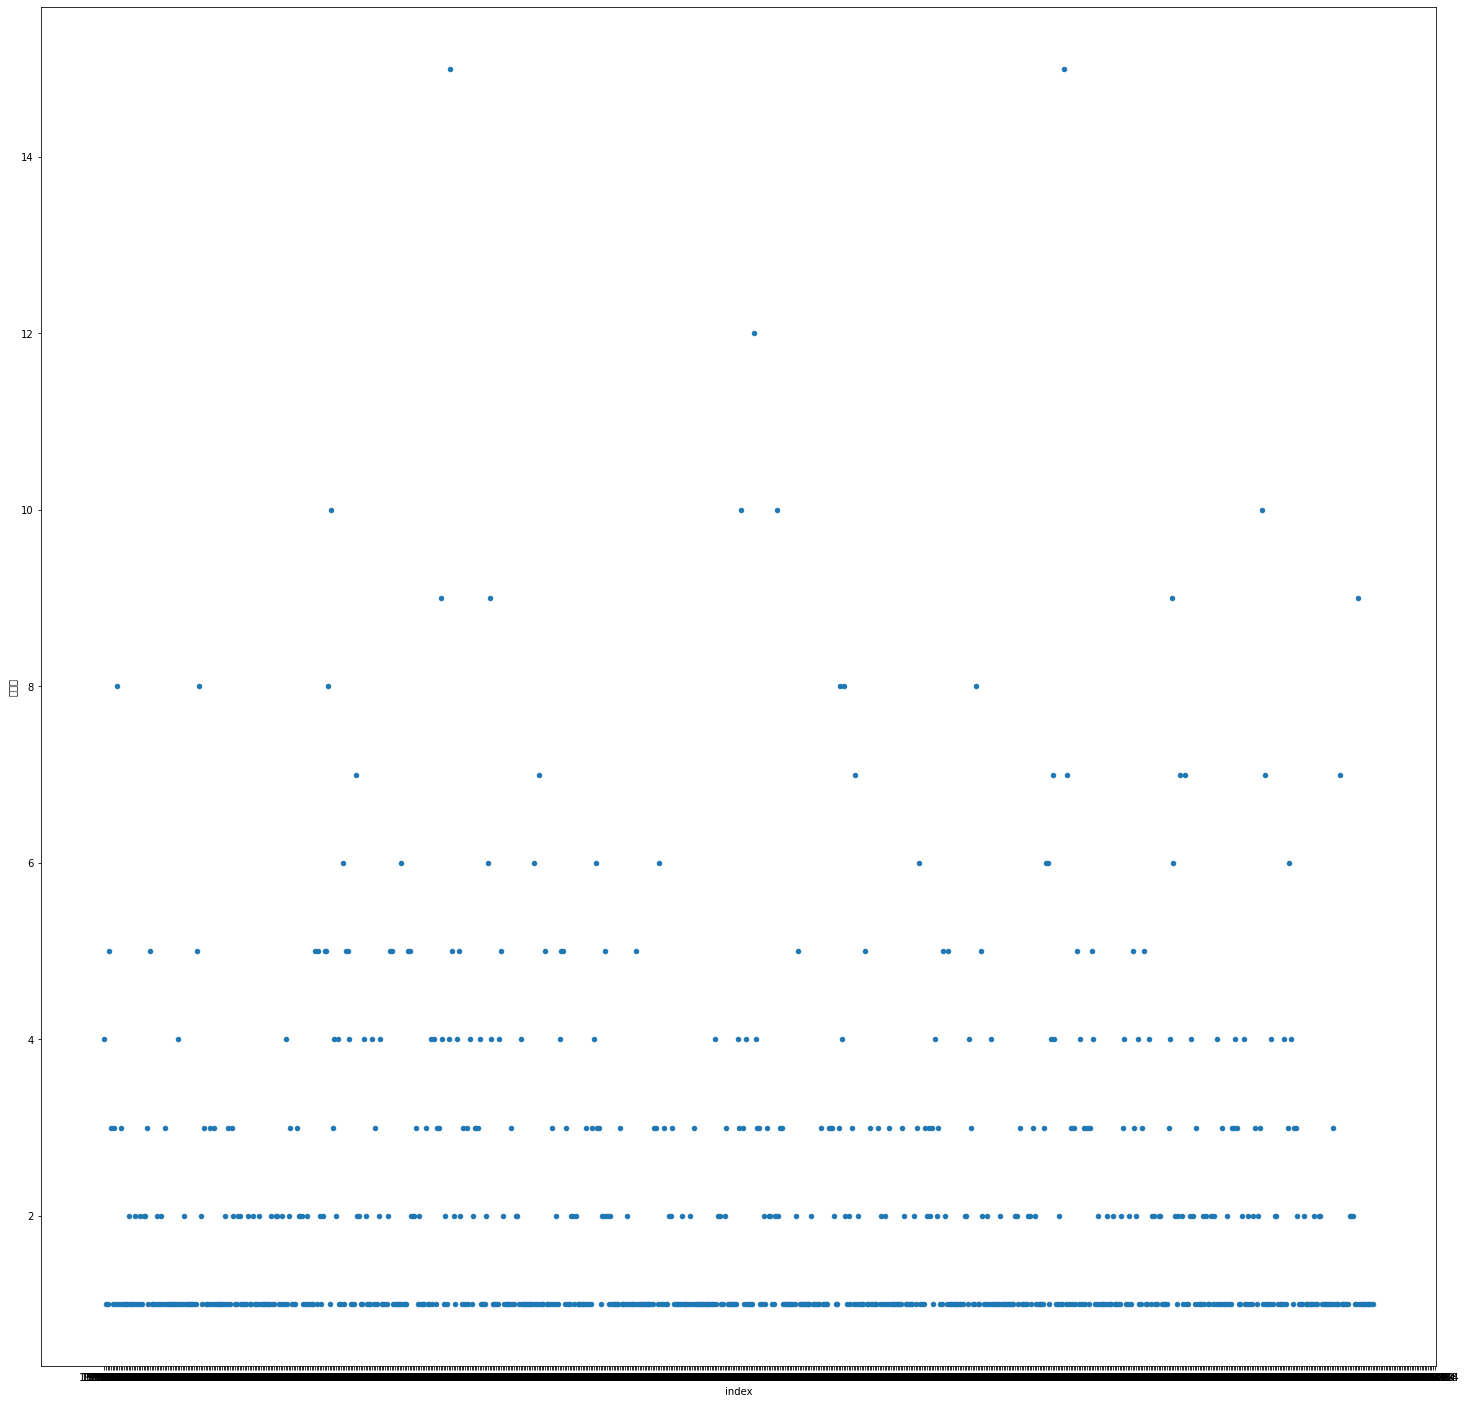

In [ ]:
nest_dict_df.plot.scatter(x='index', y='周恩來')

([<matplotlib.axis.XTick at 0x7f7323b53bd0>,
 [Text(0, 0, '毛澤東'),
  Text(0, 0, '尼克遜'),
  Text(0, 0, '陳孝威'),
  Text(0, 0, '赫魯歇夫'),
  Text(0, 0, '林彪'),
  Text(0, 0, '艾森豪'),
  Text(0, 0, '何濟公'),
  Text(0, 0, '史大林'),
  Text(0, 0, '周恩來'),
  Text(0, 0, '邱吉爾'),
  Text(0, 0, '劉少奇'),
  Text(0, 0, '李承晚'),
  Text(0, 0, '杜爾斯'),
  Text(0, 0, '戴高樂'),
  Text(0, 0, '李世民'),
  Text(0, 0, '杜魯門'),
  Text(0, 0, '狄托'),
  Text(0, 0, '李宗仁'),
  Text(0, 0, '雷根'),
  Text(0, 0, '希特勒'),
  Text(0, 0, '胡志明'),
  Text(0, 0, '中山'),
  Text(0, 0, '尼赫魯'),
  Text(0, 0, '王世昭'),
  Text(0, 0, '吳廷琰')])

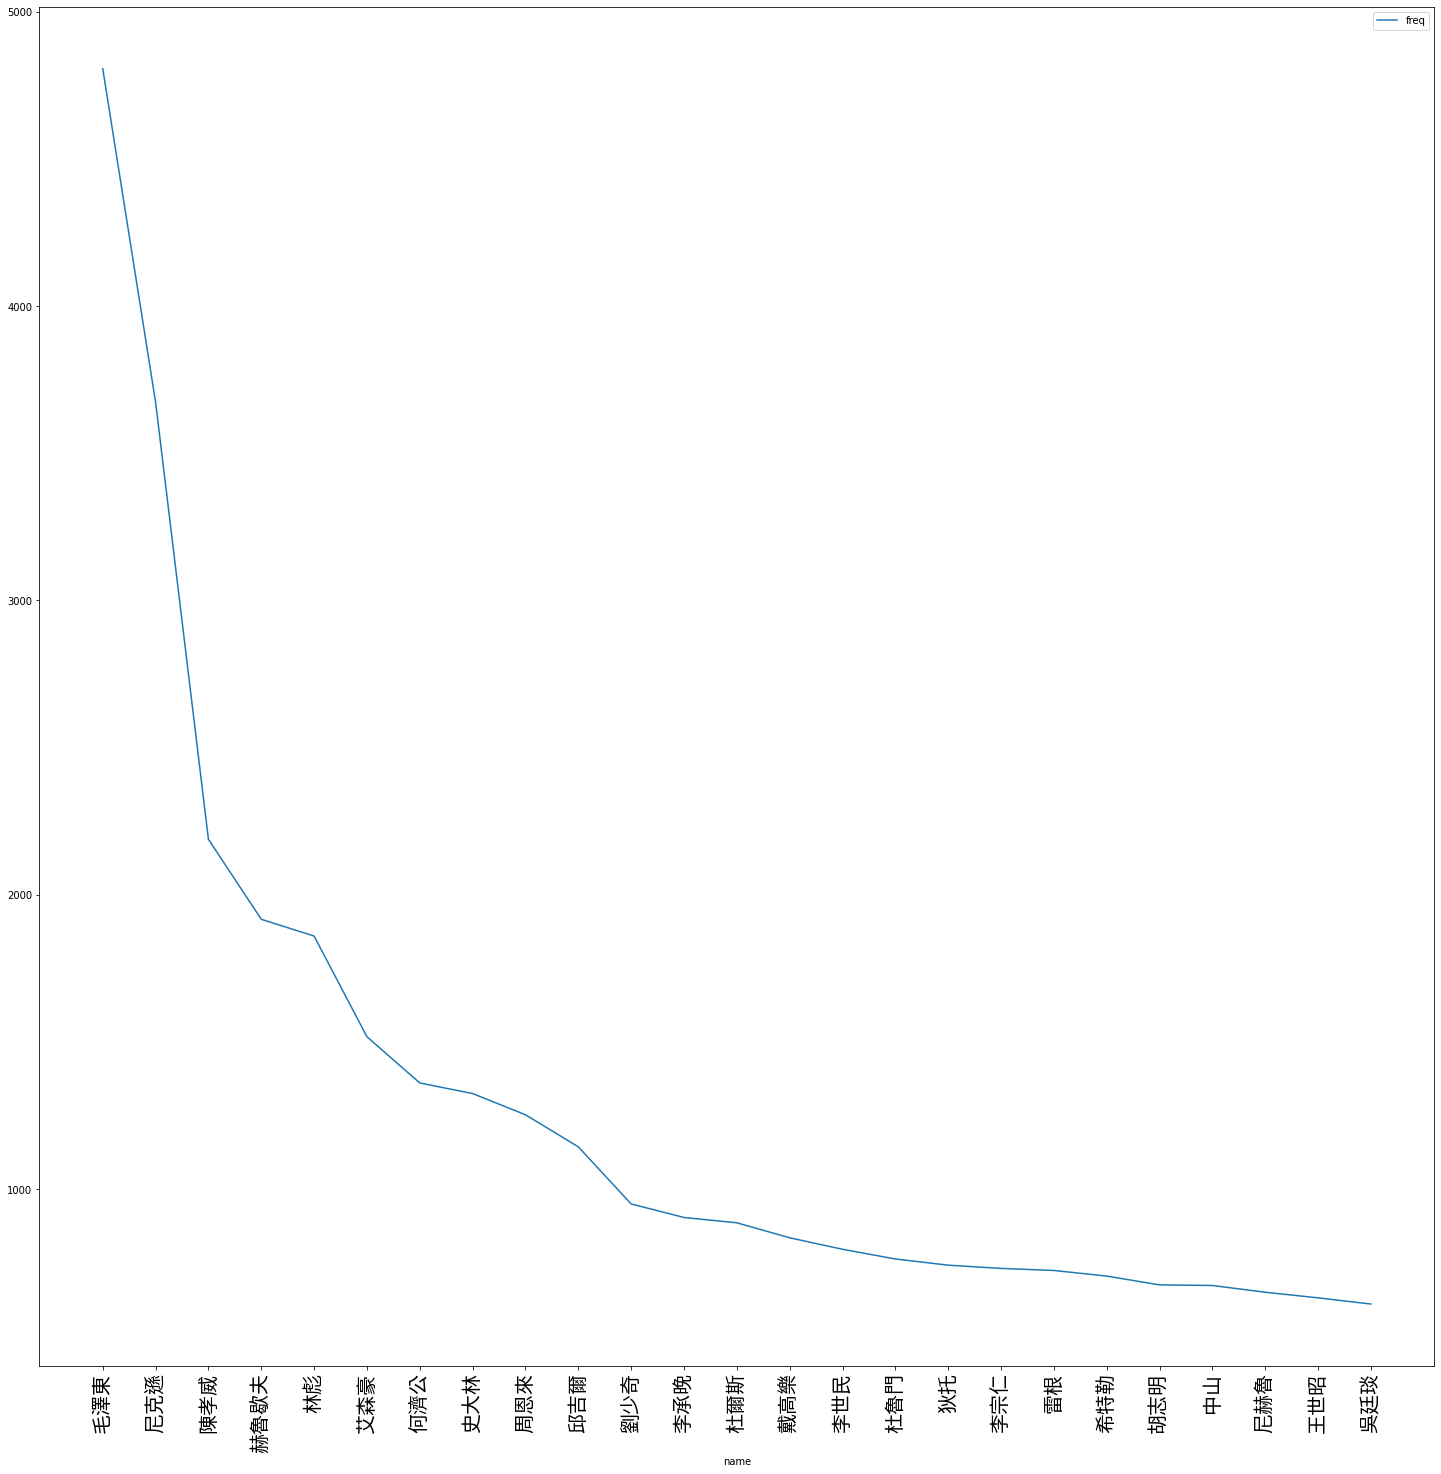

In [ ]:
df.plot.line(x="name", y="freq")
plt.xticks(x, xticks, fontproperties=fprop, fontsize=20, rotation ='vertical')

In [ ]:
import matplotlib.font_manager as fm
fmfont = fm.FontProperties(fname='/content/msjh.ttf')  # speicify font

In [ ]:
import matplotlib.font_manager
matplotlib.font_manager._rebuild()

###Co-occurance graphs, Gephi-liked NETWORK graph

emphasize on nodes and edges

> Indented block

> Indented block





fraquency chart of GPE, ORG, EVENT, PERSON 